In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
unesco_demo = pd.read_table("Data_final/unesco_demo.csv")
unesco_edu = pd.read_table("Data_final/unesco_education.csv")
resident_foreigners_norm = pd.read_table("Data_final/resident_foreigners_norm.csv")
geo_info = pd.read_table("Data_final/cepii_geo_info.csv")
geo_dist = pd.read_table("Data_final/cepii_geo_dist_norm.csv")
palette_continent = json.load(open('Statistics/color_continent_dict.json'))

geo_dist_it = geo_dist[geo_dist["iso_o"] == "ITA"]

In [3]:
# LCU: Local currency unit --> do not consider all the LCU info!
pop = unesco_demo[unesco_demo["Indicator"] == "200101"]
pop_15_64 = unesco_demo[unesco_demo["Indicator"] == "200144"]
pop_65_over = unesco_demo[unesco_demo["Indicator"] == "200151"]
pop_15_under = unesco_demo[unesco_demo["Indicator"] == "200343"]
pop_25_64 = unesco_demo[unesco_demo["Indicator"] == "200345"]

debt_serv = unesco_demo[unesco_demo["Indicator"] == "DT_TDS_DECT_GN_ZS"]
gdp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_CD"]
#gdp_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_CN"]
gdp_2010dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KD"]
gdp_growth = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KD_ZG"]
#gdp_constant_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KN"]
# PPP: purchasing power parity
gdp_ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_PP_CD"]
gdp_ppp_2011dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_PP_KD"]
# pc: per capita
gdp_pc_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_CD"]
#gdp_pc_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_CN"]
gdp_pc__ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_PP_CD"]
gdp_pc__ppp_2011dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_PP_KD"]
# GNI: Gross nationale income
#gni_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_MKTP_CN"]
gni_pc_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_CD"]
#gni_pc_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_CN"]
gni_pc_ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_PP_CD"]
dec_conversion = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_ATLS"]
exchange_rate = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_FCRF"]
ppp_coversion = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PPP"]
price_ratio_ppp = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PPPC_RF"]
#ppp_coversion_lcu = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PRVT_PP"]
hiv = unesco_demo[unesco_demo["Indicator"] == "SH_DYN_AIDS_ZS"]
poverty1 = unesco_demo[unesco_demo["Indicator"] == "SI_POV_2DAY"]
poverty2 = unesco_demo[unesco_demo["Indicator"] == "SI_POV_DDAY"]
infant_mortality_rate = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_IMRT_IN"]
birth_life_exp = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_LE00_IN"]
fertility_rate = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_TFRT_IN"]
pop_growth = unesco_demo[unesco_demo["Indicator"] == "SP_POP_GROW"]
rural_pop = unesco_demo[unesco_demo["Indicator"] == "SP_RUR_TOTL_ZS"]
#gov_tot_exp_current_lcu = unesco_demo[unesco_demo["Indicator"] == "XTGOV_IMF"]


edu_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF"]
pre_prim_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_02"]
prim_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_1"]
lower_sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2"]
sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2T3"]
non_ter_gov_exp1 = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2T4_V"]
upper_sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_3"]
non_ter_gov_exp2 = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_4"]
ter_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_5T8"]

In [4]:
it_resident_foreigners = resident_foreigners_norm.groupby(["Country", "Year"])["Value"].sum()
pop = pop.groupby(["iso3", "Year"])["Value"].sum()
pop_15_64 = pop_15_64.groupby(["iso3", "Year"])["Value"].sum()
pop_65_over = pop_65_over.groupby(["iso3", "Year"])["Value"].sum()
pop_15_under = pop_15_under.groupby(["iso3", "Year"])["Value"].sum()
pop_25_64 = pop_25_64.groupby(["iso3", "Year"])["Value"].sum()
debt_serv = debt_serv.groupby(["iso3", "Year"])["Value"].sum()
gdp_current_dollar = gdp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_2010dollar = gdp_2010dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_growth = gdp_growth.groupby(["iso3", "Year"])["Value"].sum()
gdp_ppp_current_dollar = gdp_ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_ppp_2011dollar = gdp_ppp_2011dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc_current_dollar = gdp_pc_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc__ppp_current_dollar = gdp_pc__ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc__ppp_2011dollar = gdp_pc__ppp_2011dollar.groupby(["iso3", "Year"])["Value"].sum()
gni_pc_current_dollar = gni_pc_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gni_pc_ppp_current_dollar = gni_pc_ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
dec_conversion = dec_conversion.groupby(["iso3", "Year"])["Value"].sum()
exchange_rate = exchange_rate.groupby(["iso3", "Year"])["Value"].sum()
ppp_coversion = ppp_coversion.groupby(["iso3", "Year"])["Value"].sum()
price_ratio_ppp = price_ratio_ppp.groupby(["iso3", "Year"])["Value"].sum()
hiv = hiv.groupby(["iso3", "Year"])["Value"].sum()
poverty1 = poverty1.groupby(["iso3", "Year"])["Value"].sum()
poverty2 = poverty2.groupby(["iso3", "Year"])["Value"].sum()
infant_mortality_rate = infant_mortality_rate.groupby(["iso3", "Year"])["Value"].sum()
birth_life_exp = birth_life_exp.groupby(["iso3", "Year"])["Value"].sum()
fertility_rate = fertility_rate.groupby(["iso3", "Year"])["Value"].sum()
pop_growth = pop_growth.groupby(["iso3", "Year"])["Value"].sum()
rural_pop = rural_pop.groupby(["iso3", "Year"])["Value"].sum()

edu_gov_exp = edu_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
pre_prim_gov_exp = pre_prim_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
prim_gov_exp = prim_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
lower_sec_gov_exp = lower_sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
sec_gov_exp = sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
non_ter_gov_exp1 = non_ter_gov_exp1.groupby(["iso3", "Year"])["Value"].sum()
upper_sec_gov_exp = upper_sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
non_ter_gov_exp2 = non_ter_gov_exp2.groupby(["iso3", "Year"])["Value"].sum()
ter_gov_exp = ter_gov_exp.groupby(["iso3", "Year"])["Value"].sum()

In [6]:
def simple_regression(x_data, y_data, years, label_y, log = (True, True), fit_reg = True):
    all_c = it_resident_foreigners.index.levels[0]
    list_year = defaultdict(list)
    not_found = []
    if type(y_data) == pd.core.series.Series:
        for year in years:
            for c in all_c:
                try:
                    temp1 = x_data[c][year]
                    temp2 = y_data[c][year]
                except KeyError:
                    not_found.append(c)
                # the != 0 conditions are needed, otherwise when the log transformation is performed a -inf is obtained
                if c not in not_found and temp1 != 0 and temp2 != 0:
                    #print(c, geo_info[geo_info["iso3"] == c]["continent"].values[0])
                    list_year["foreigners"].append(temp1)
                    list_year["y"].append(temp2)
                    list_year["year"].append(year)
                    list_year["Continent"].append(geo_info[geo_info["iso3"] == c]["continent"].values[0])
    else:
        col0 = y_data.columns[0]
        col1 = y_data.columns[1]
        for year in years:
            for c in all_c:
                try:
                    temp1 = x_data[c][year]
                    temp2 = y_data[y_data[col0] == c][col1].values[0]
                except (KeyError, IndexError) as error:
                    not_found.append(c)
                # the != 0 conditions are needed, otherwise when the log transformation is performed a -inf is obtained
                if c not in not_found and temp1 != 0 and temp2 != 0:
                    #print(c, geo_info[geo_info["iso3"] == c]["continent"].values[0])
                    list_year["foreigners"].append(temp1)
                    list_year["y"].append(temp2)
                    list_year["year"].append(year)
                    list_year["Continent"].append(geo_info[geo_info["iso3"] == c]["continent"].values[0])
        

    temp = pd.DataFrame.from_dict(list_year)
    
    #print(temp)
    
    if log[0] == True:
        temp["foreigners"] = list(map(np.log, temp["foreigners"]))
        x_label = "log Foreigners"
    else:
        x_label = "Foreigners"
    if log[1] == True:
        #if all(isinstance(n, float) for n in temp["y"]):
            #temp["y"] = [round(n) for n in temp["y"]]   
        temp["y"] = list(map(np.log, temp["y"]))           
        y_label = "log "+label_y
    else:
        y_label = label_y
        
    sns.set_style("whitegrid")
    sns.set_context({"figure.figsize": (10, 8)})
    g = sns.lmplot(x="foreigners", y="y", data=temp, fit_reg=fit_reg, col = "year", col_wrap = 3, hue = "Continent", palette = palette_continent)
    ax = plt.gca()
    for ax in g.axes.flat:
        g.set_xlabels(x_label, fontsize=12)
        g.set_ylabels(y_label, fontsize=12)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle("Number Foreigners vs "+label_y, fontsize = 16)
    plt.show()
    plt.close()
  
  

In [7]:
def get_out(data1_, threshold1, s1 = True, data2_ = None, threshold2 = 0, s2 = True):
    
    if type(data1_) != pd.core.frame.DataFrame:
        temp = np.log(data1_)
        if s1:
            temp1 = set([i[0] for i in list(temp[temp >= threshold1].index)])
        else:
            temp1 = set([i[0] for i in list(temp[temp <= threshold1].index)])
    else:
        col0 = data1_.columns[0]
        col1 = data1_.columns[1]
        temp = data1_.copy()
        temp[col1] = np.log(data1_[col1])
        if s1:
            temp1 = data1_[temp[col1] >= threshold1][col0].values
        else:
            temp1 = data1_[temp[col1] <= threshold1][col0].values
    if type(data2_) != type(None):
        temp_ = np.log(data2_)
        if s2:
            temp2 = set([i[0] for i in list(temp_[temp_ >= threshold2].index)])
        else:
            temp2 = set([i[0] for i in list(temp_[temp_ <= threshold2].index)])
        return(list(temp1.intersection(temp2)))
    else:
        return(list(temp1))

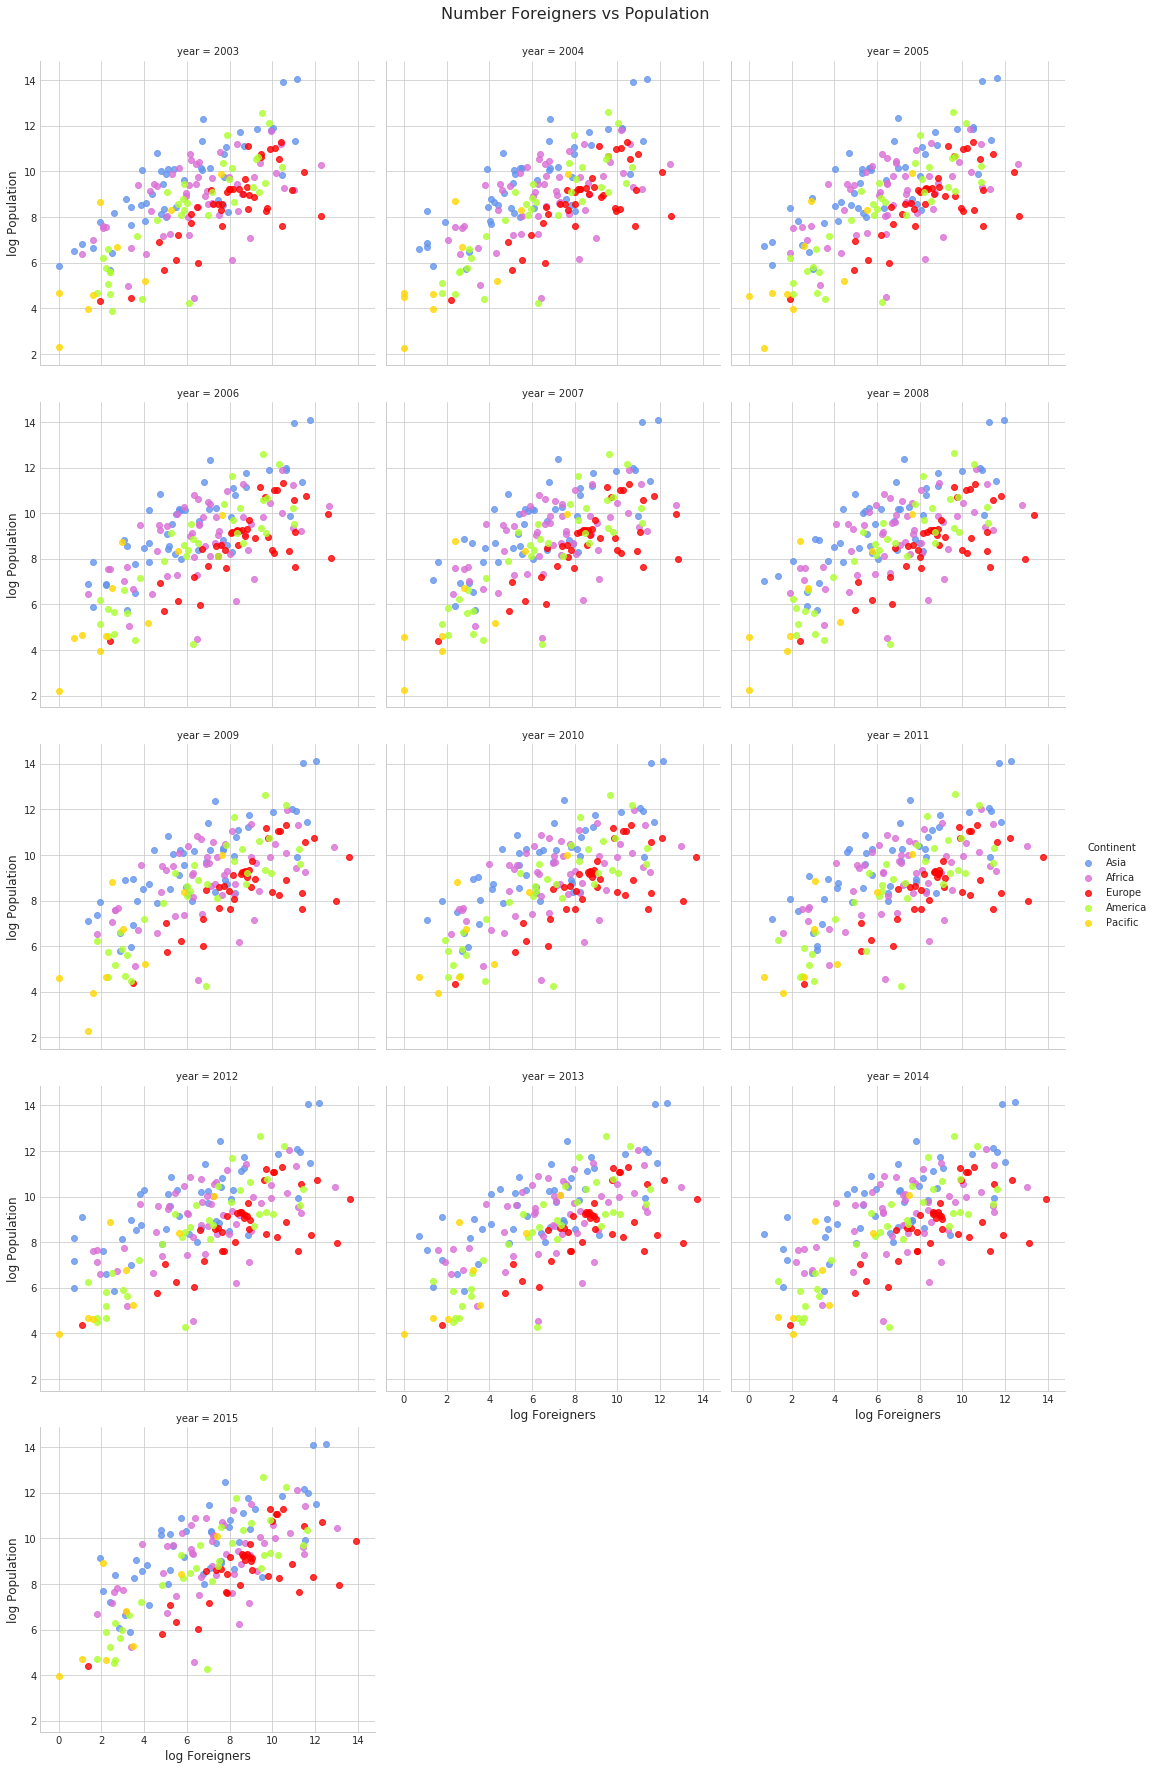

In [8]:
simple_regression(it_resident_foreigners, pop, list(range(2003, 2016)), "Population", fit_reg = False)

In [9]:
get_out(pop, 13.5)

['CHN', 'IND']

In [10]:
get_out(pop, 2.5, False, it_resident_foreigners, 0, False)

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


['NRU', 'TUV']

In [11]:
get_out(pop, 5, False, it_resident_foreigners, 5, True)

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


['SMR', 'DMA', 'SYC']

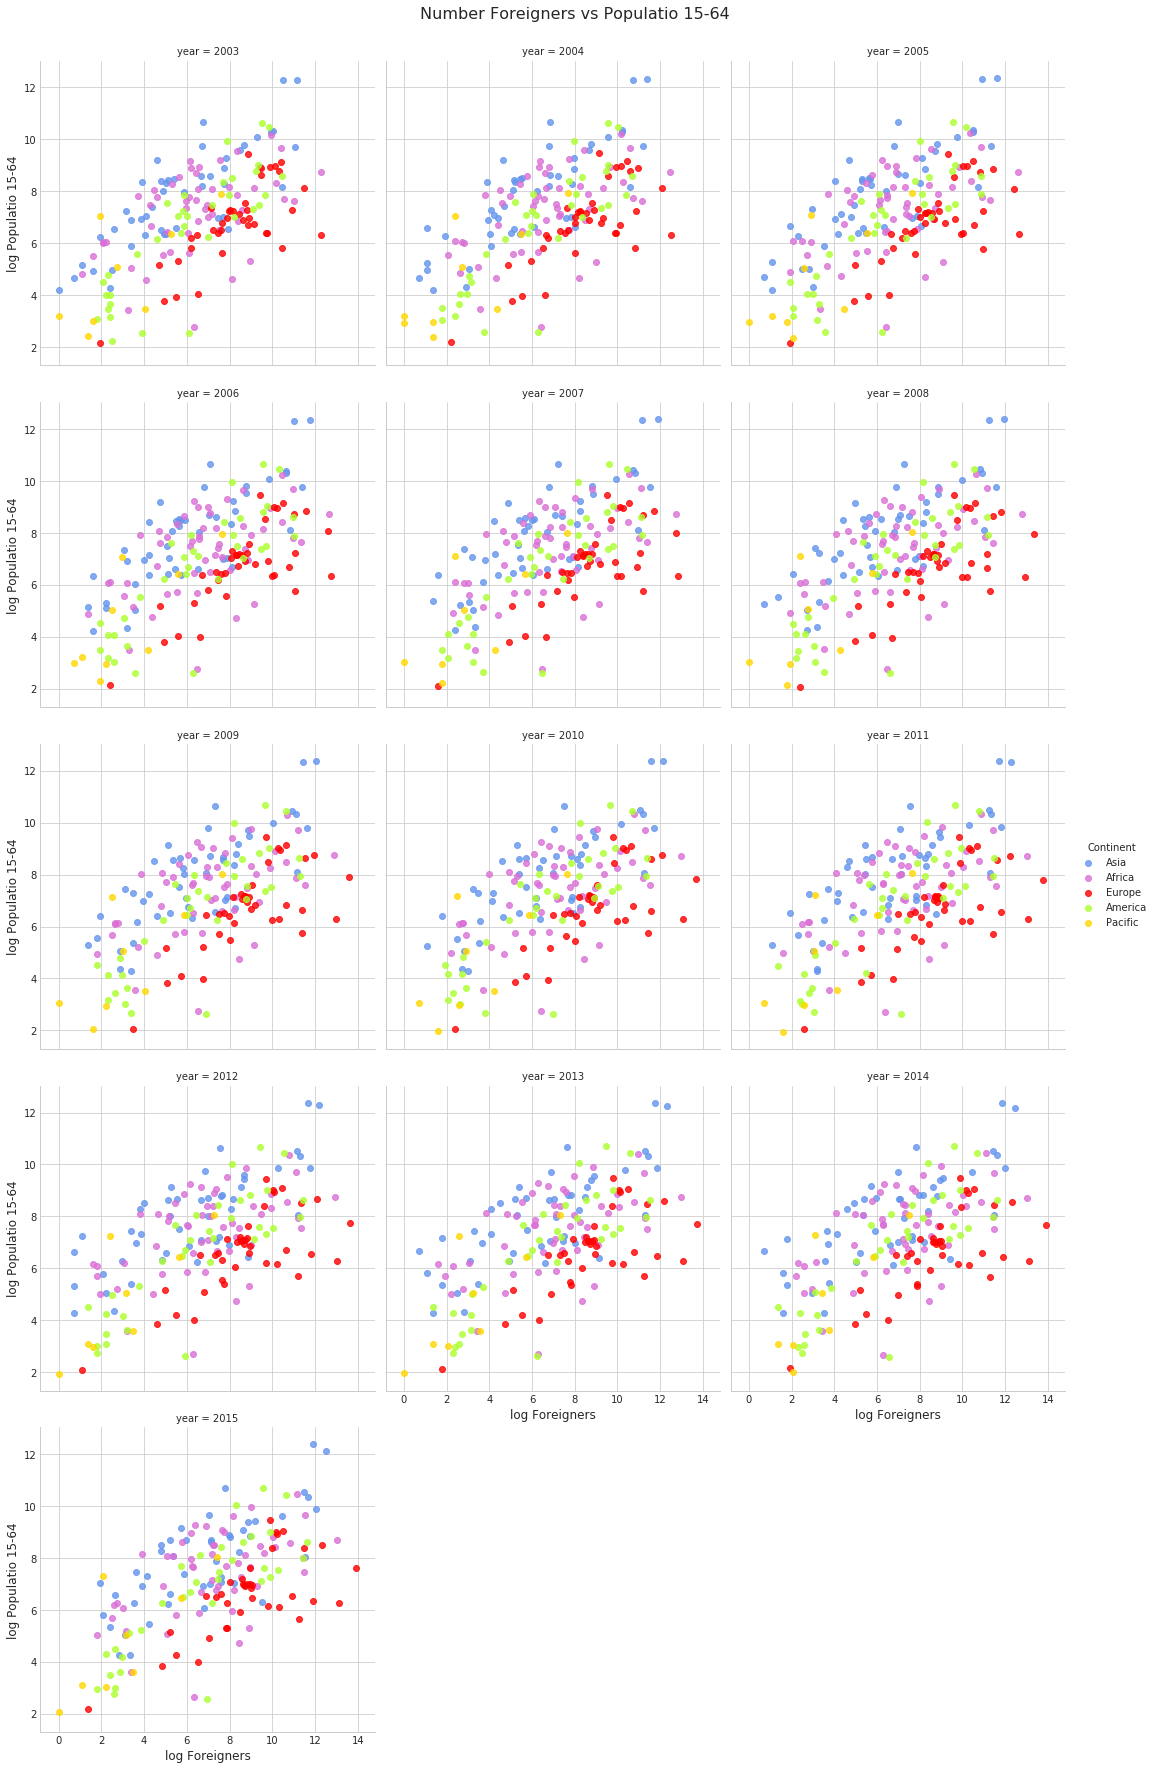

In [12]:
simple_regression(it_resident_foreigners, pop_15_64, list(range(2003, 2016)), "Populatio 15-64", fit_reg = False)

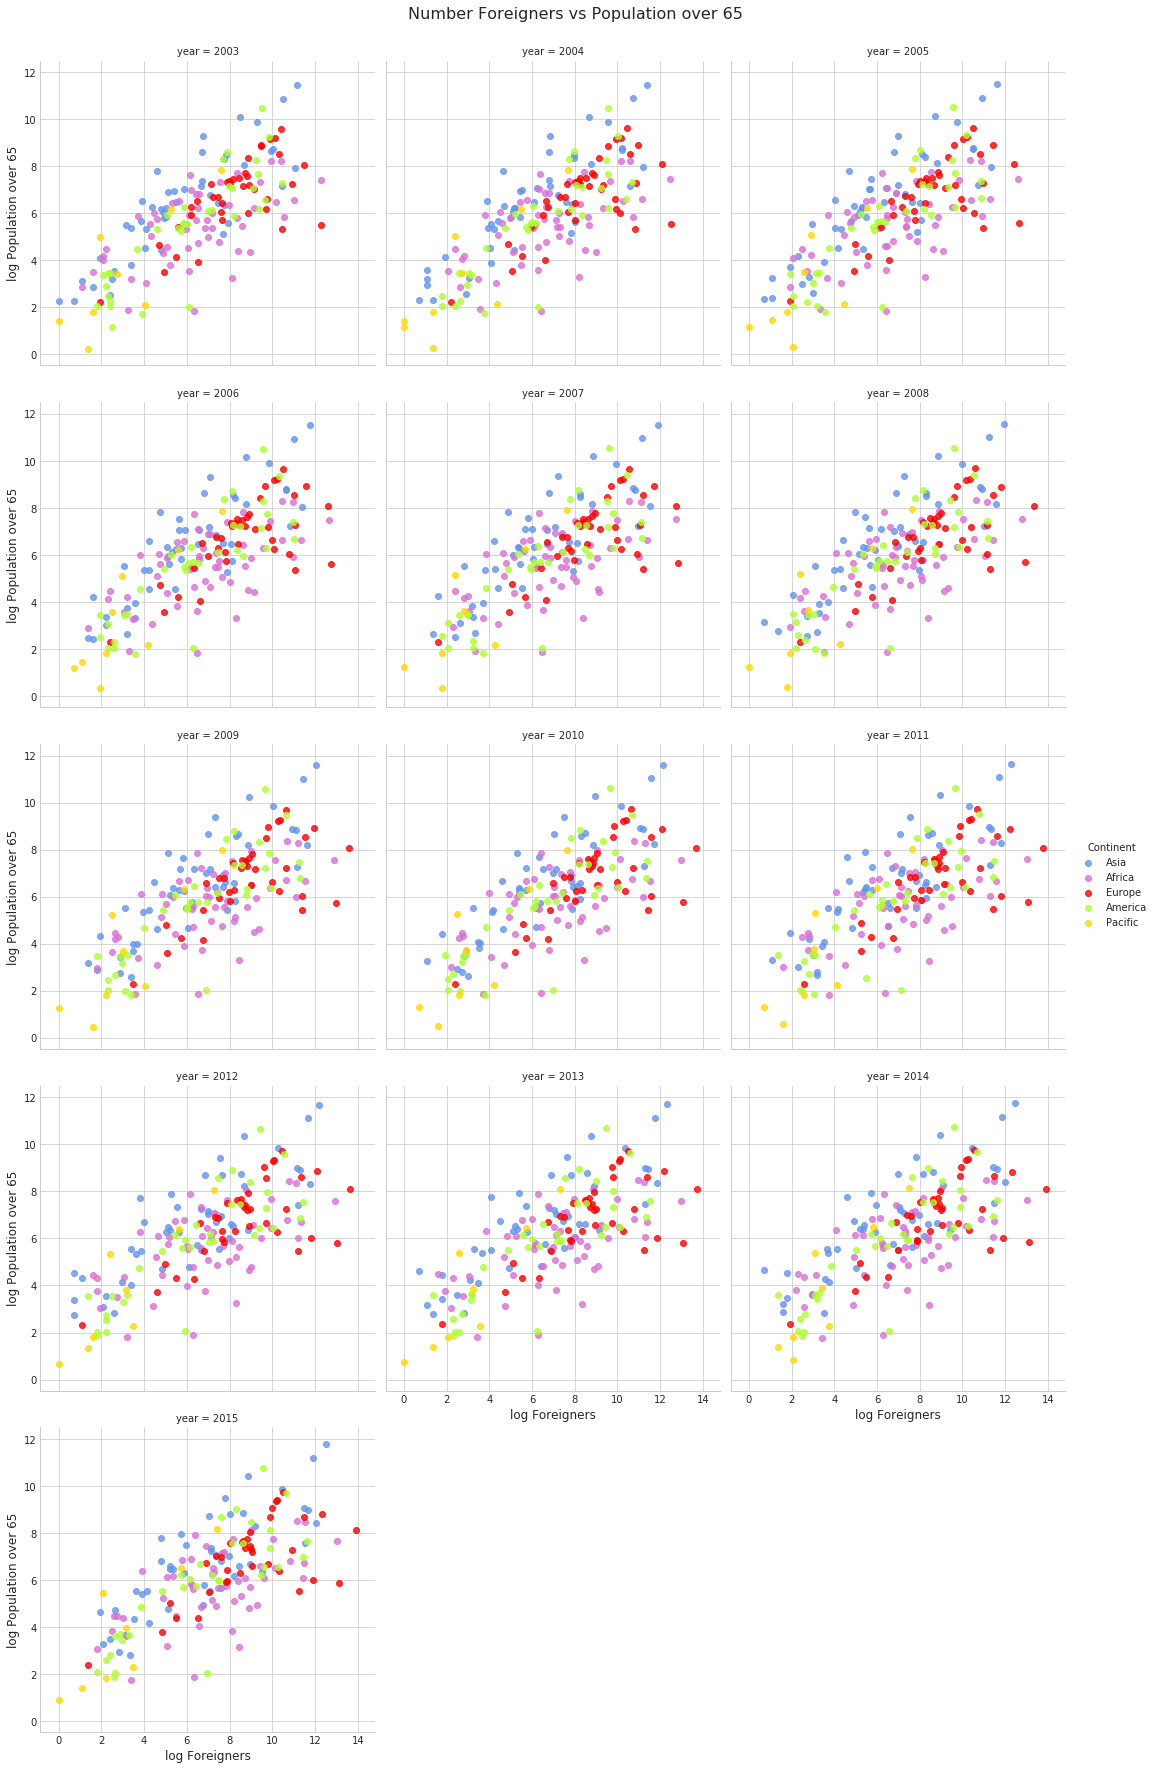

In [13]:
simple_regression(it_resident_foreigners, pop_65_over, list(range(2003, 2016)), "Population over 65", fit_reg = False)

In [14]:
#simple_regression(it_resident_foreigners, pop_15_under, list(range(2003, 2016)), "Population under 15", fit_reg = False)

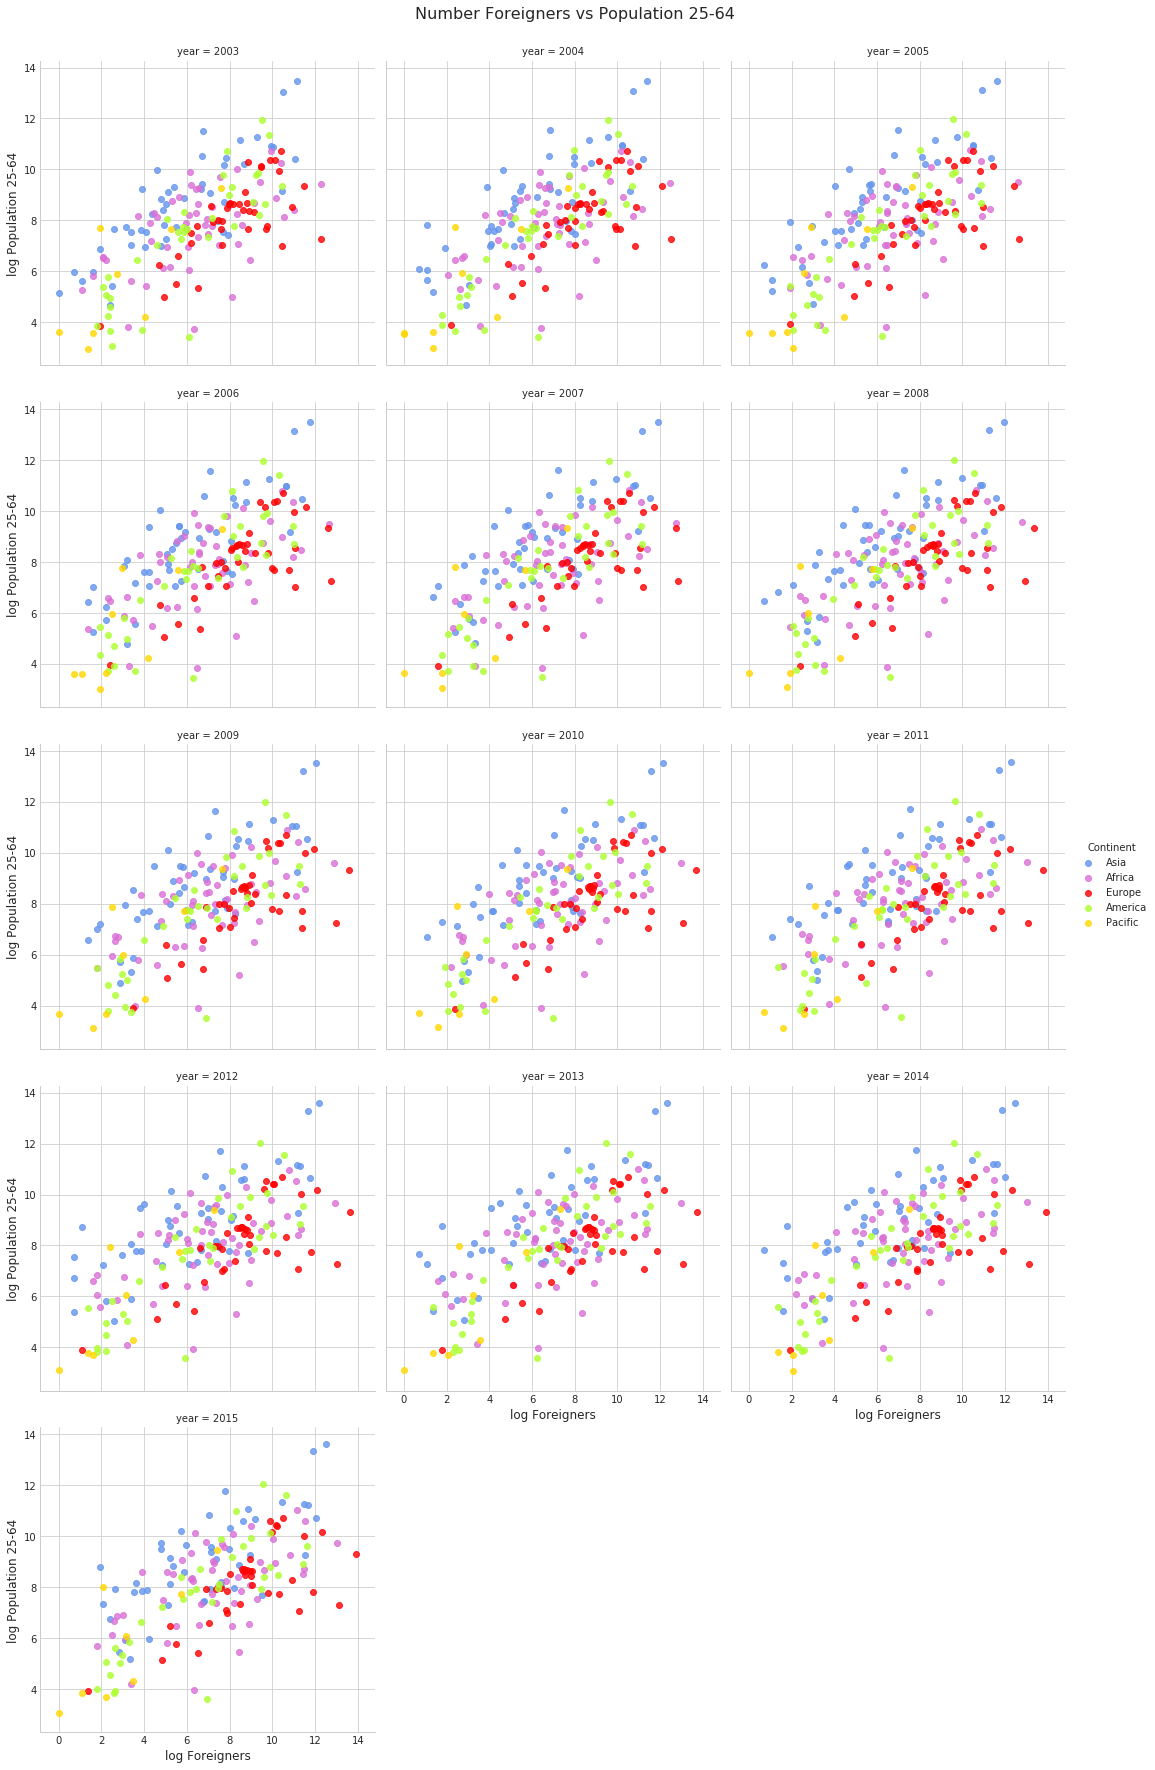

In [15]:
simple_regression(it_resident_foreigners, pop_25_64, list(range(2003, 2016)), "Population 25-64", fit_reg = False)

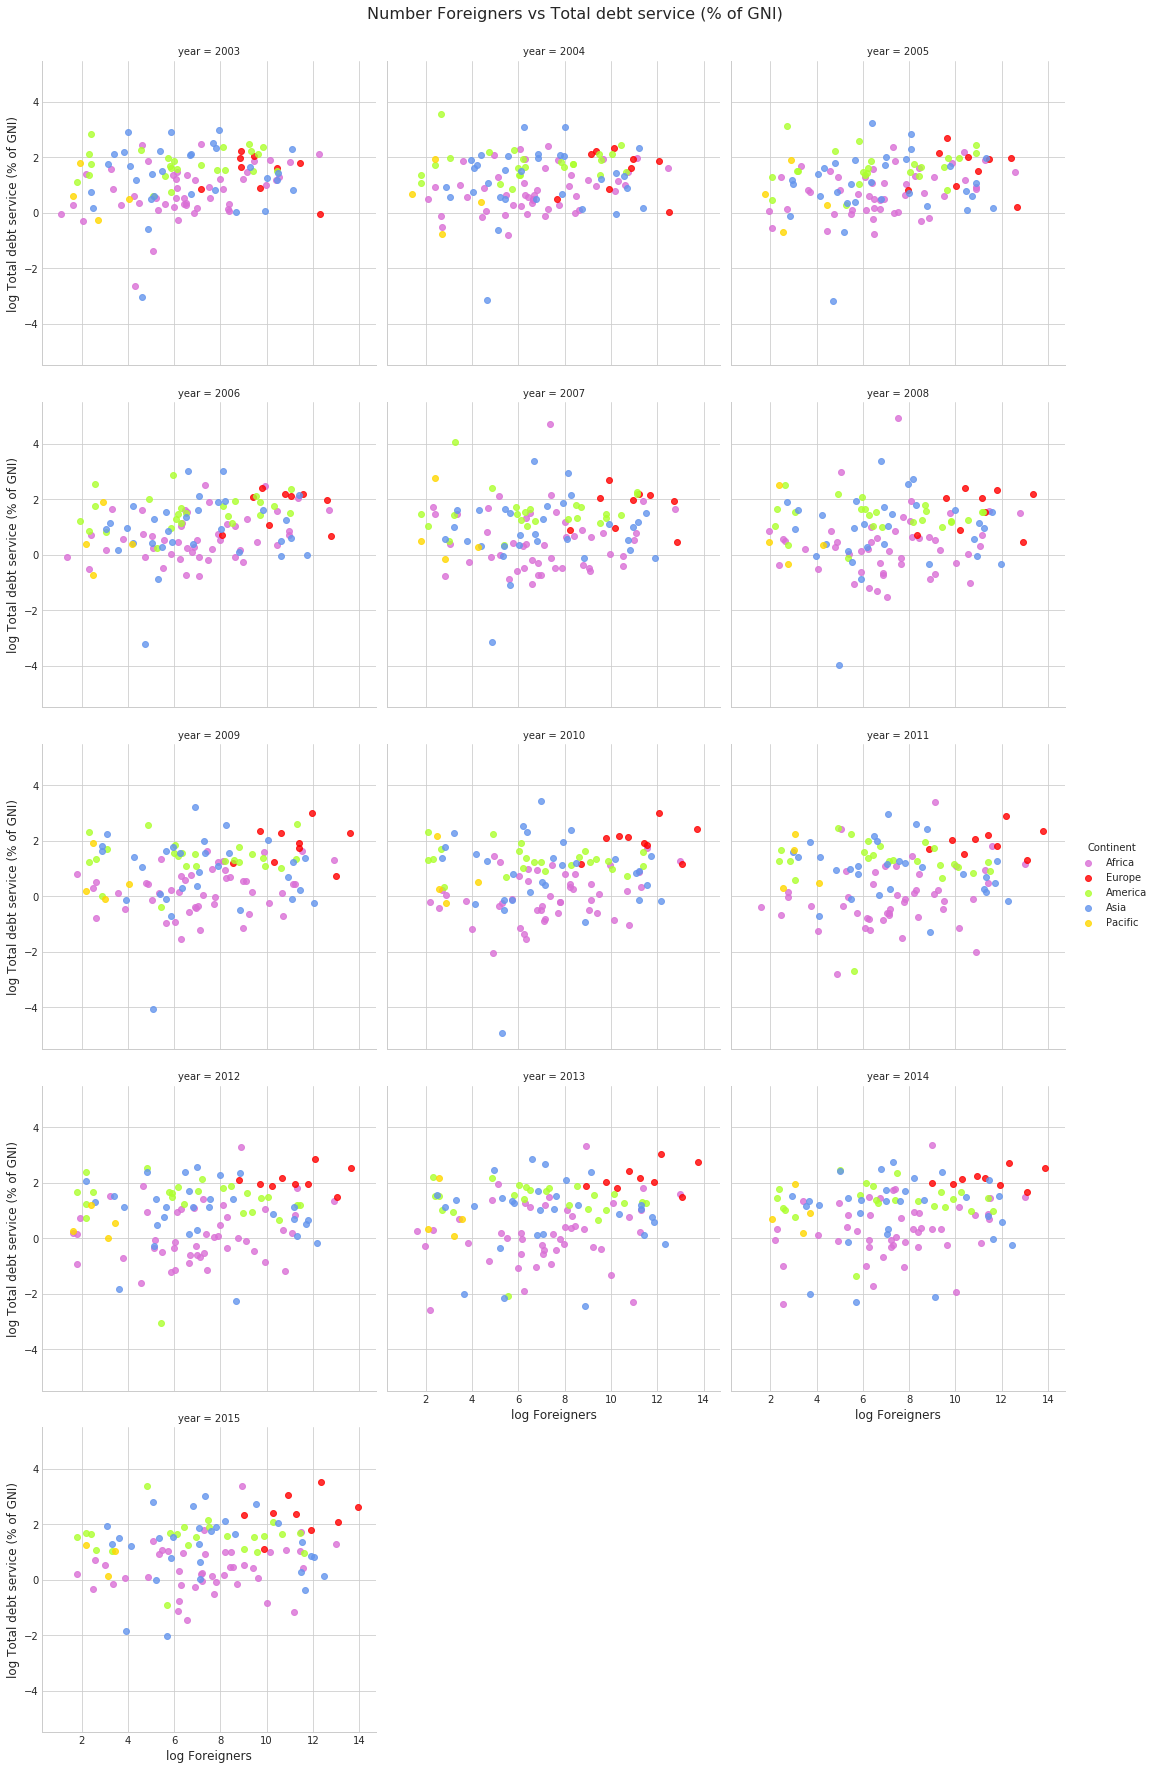

In [16]:
simple_regression(it_resident_foreigners, debt_serv, list(range(2003, 2016)), "Total debt service (% of GNI)", fit_reg = False)

In [17]:
get_out(debt_serv, -2, False)

['NGA', 'AFG', 'CAF', 'HTI', 'TKM', 'COM', 'IRN', 'SOM', 'MMR']

In [18]:
get_out(debt_serv, -4, False)

['SOM', 'MMR']

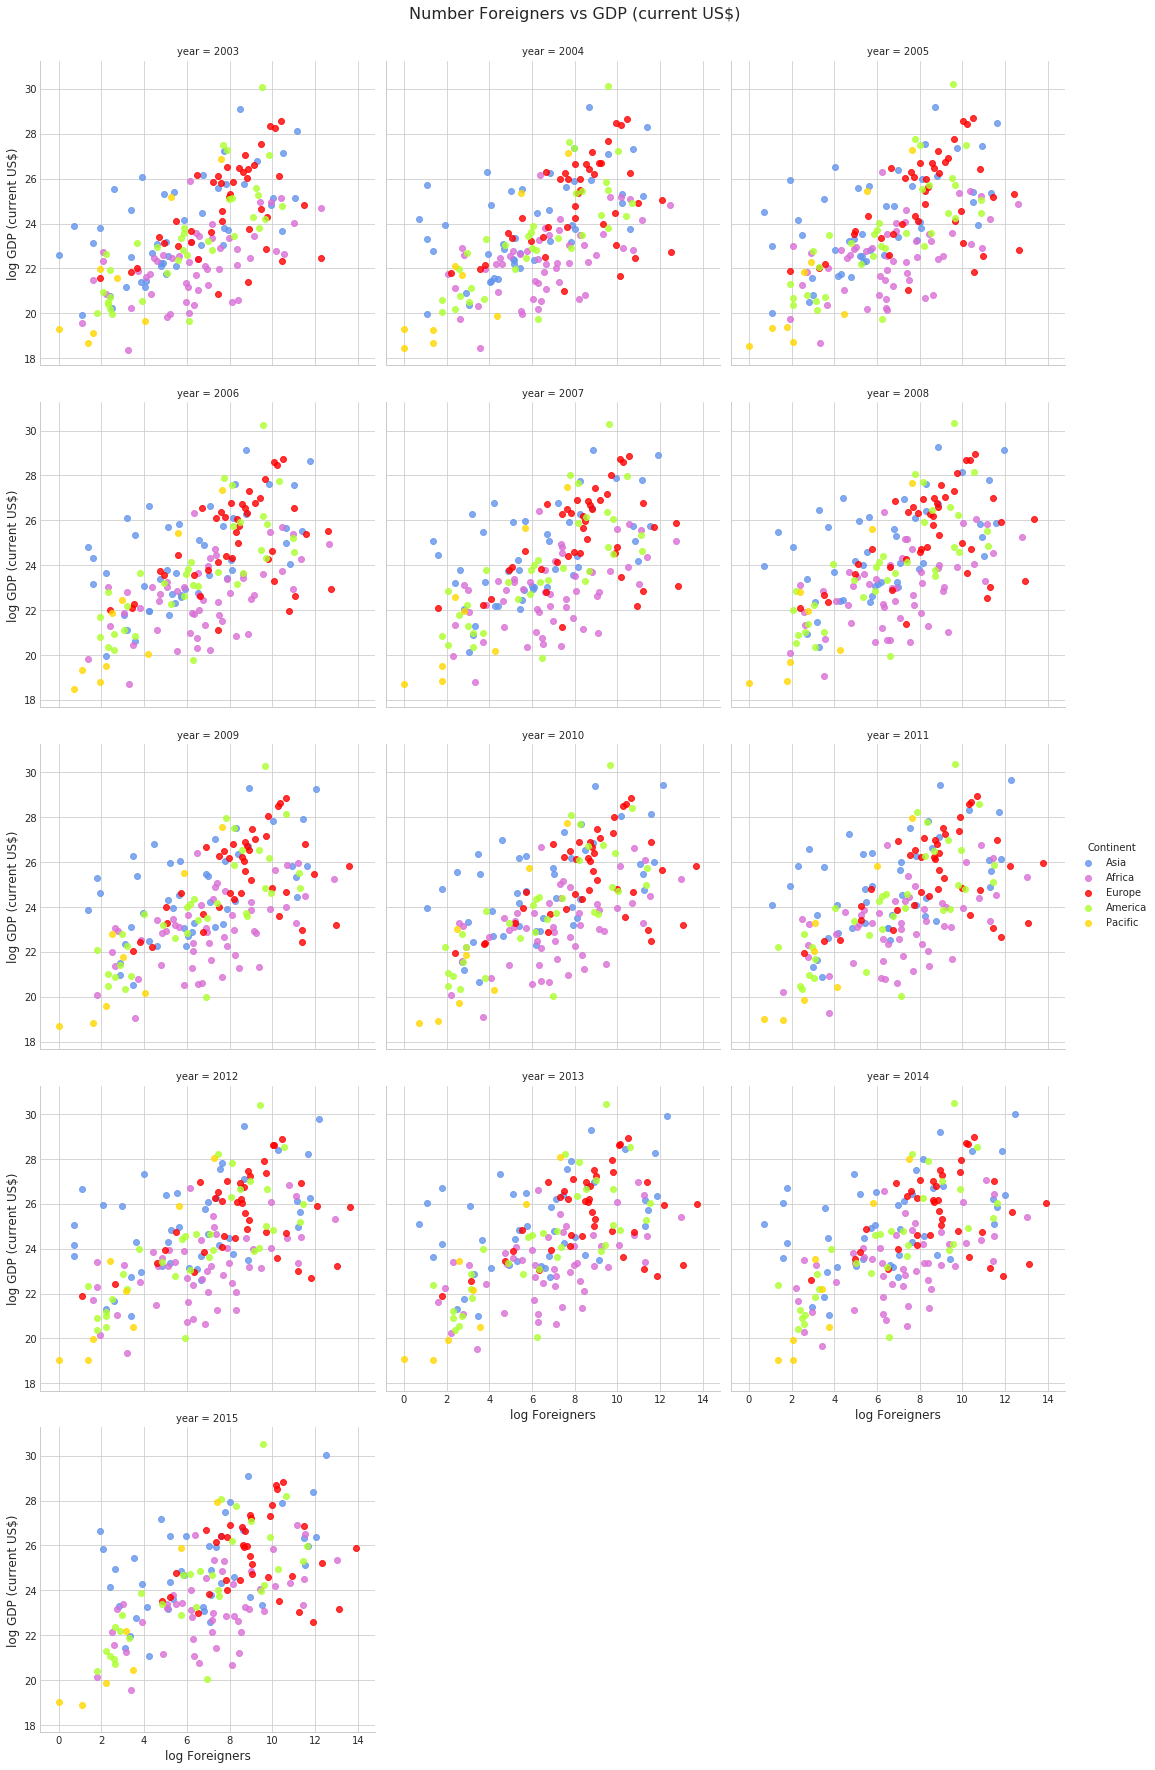

In [19]:
simple_regression(it_resident_foreigners, gdp_current_dollar, list(range(2003, 2016)), "GDP (current US$)", fit_reg=False)

In [20]:
get_out(gdp_current_dollar, 20, False, it_resident_foreigners, 2, False)

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


['NRU',
 'PLW',
 'FSM',
 'KNA',
 'MHL',
 'KIR',
 'TLS',
 'VUT',
 'COM',
 'VCT',
 'TON',
 'TUV',
 'SLB']

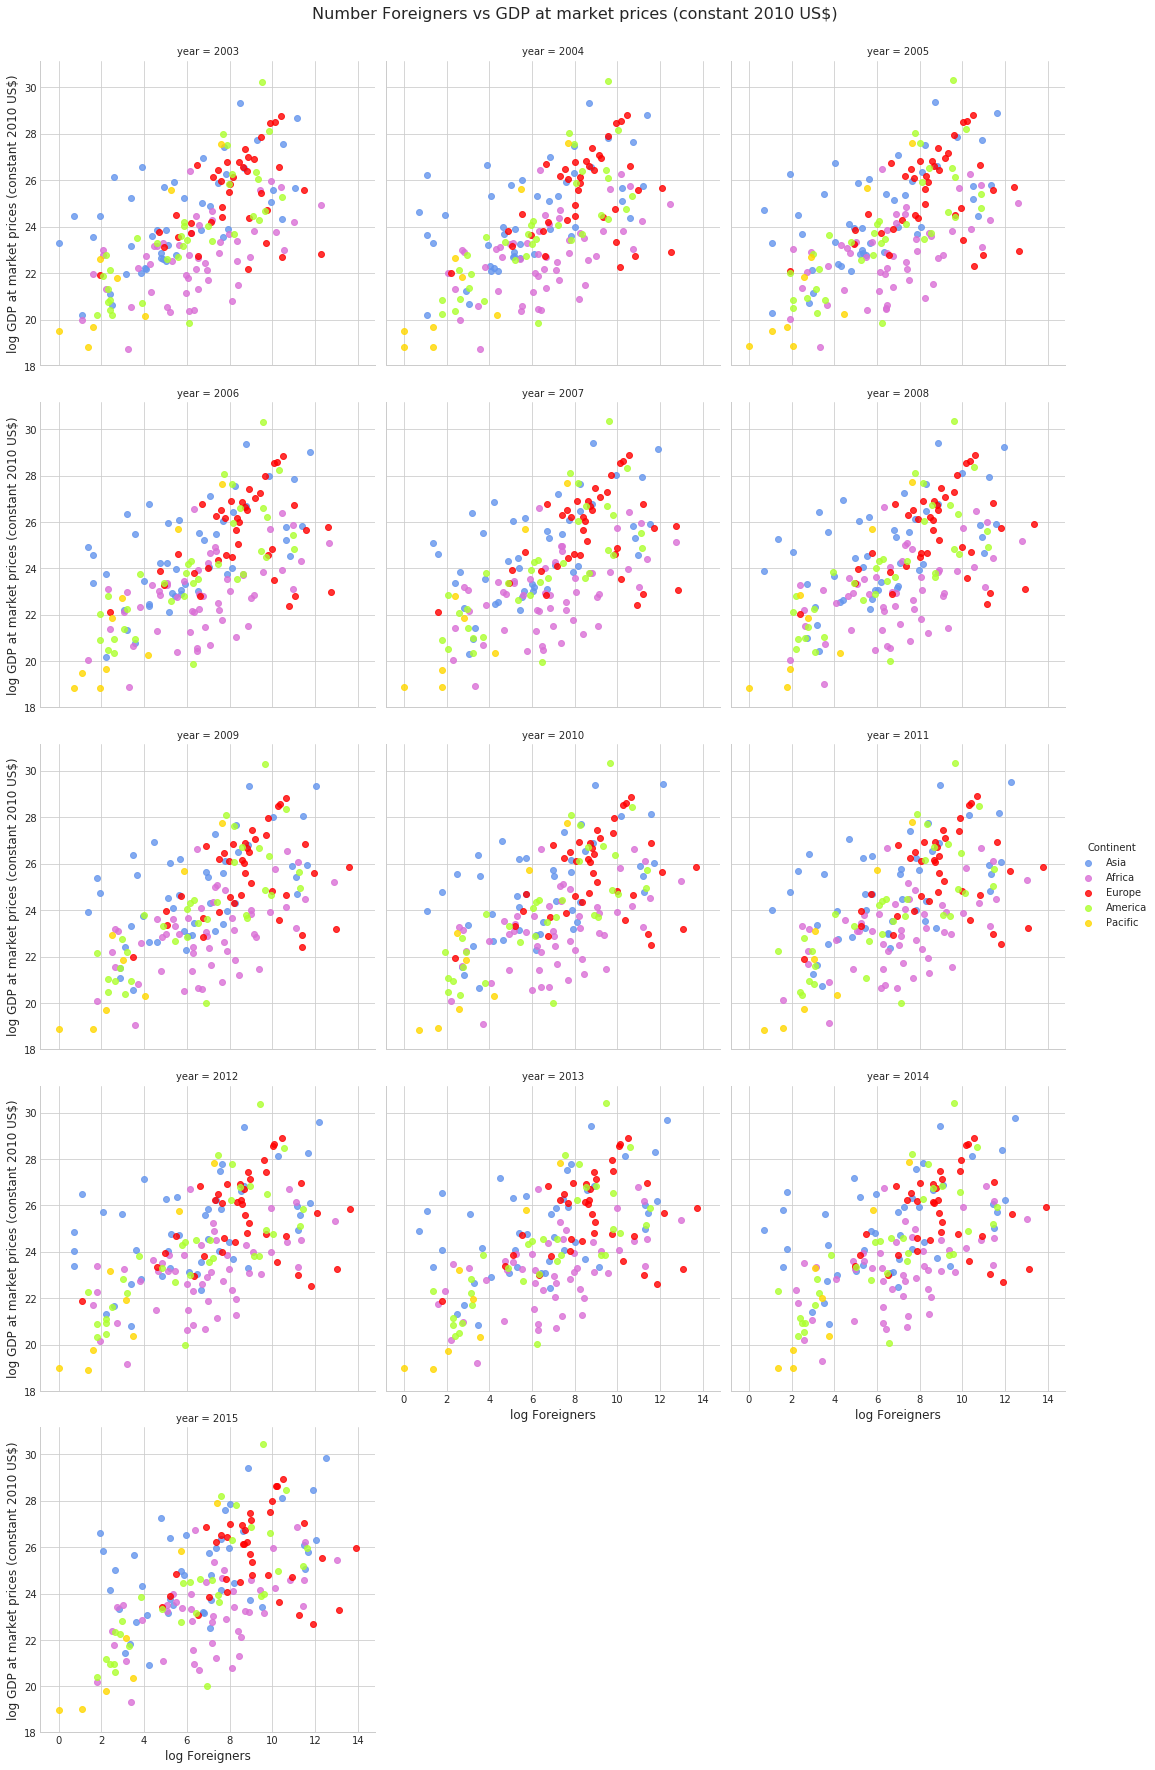

In [21]:
simple_regression(it_resident_foreigners, gdp_2010dollar, list(range(2003, 2016)), "GDP at market prices (constant 2010 US$)", fit_reg=False)

In [22]:
#simple_regression(it_resident_foreigners, gdp_growth, list(range(2003, 2016)), "GDP growth (annual %)", fit_reg=False)

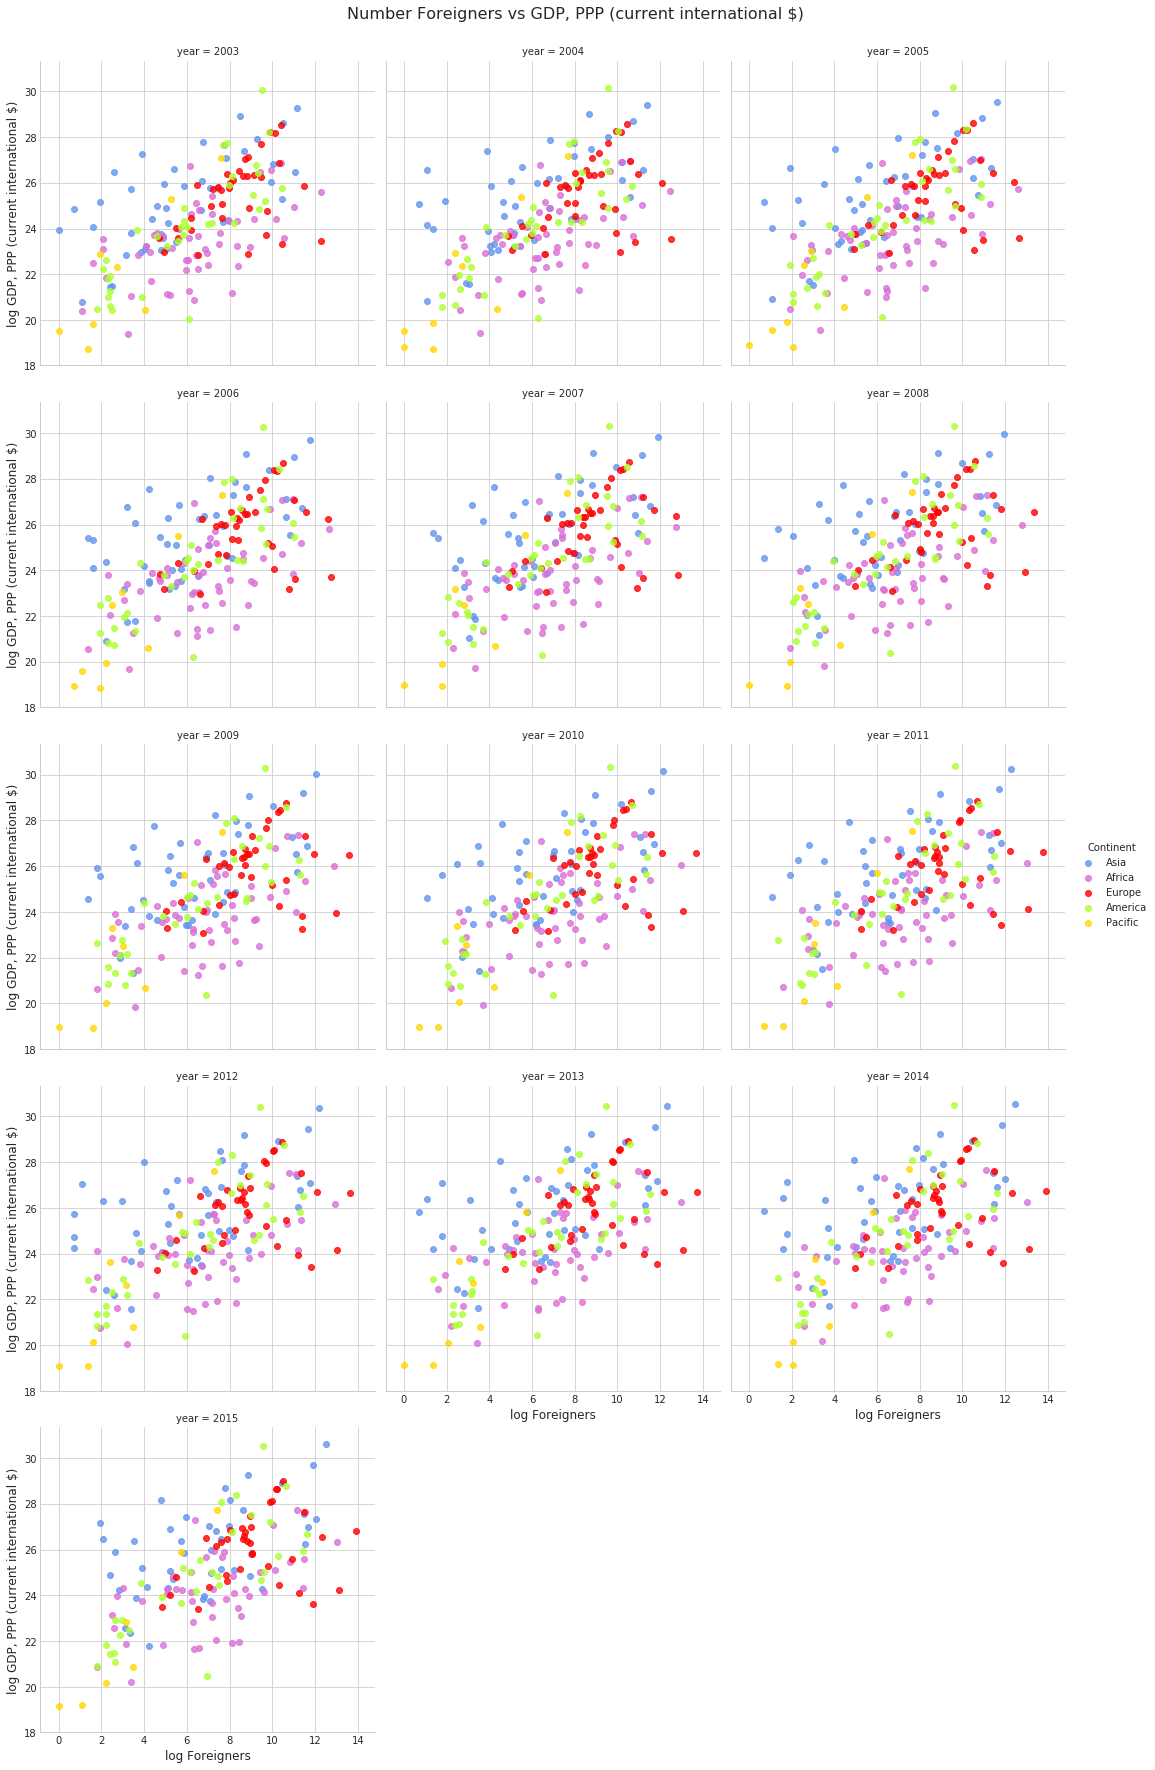

In [23]:
simple_regression(it_resident_foreigners, gdp_ppp_current_dollar, list(range(2003, 2016)), "GDP, PPP (current international $)", fit_reg=False)

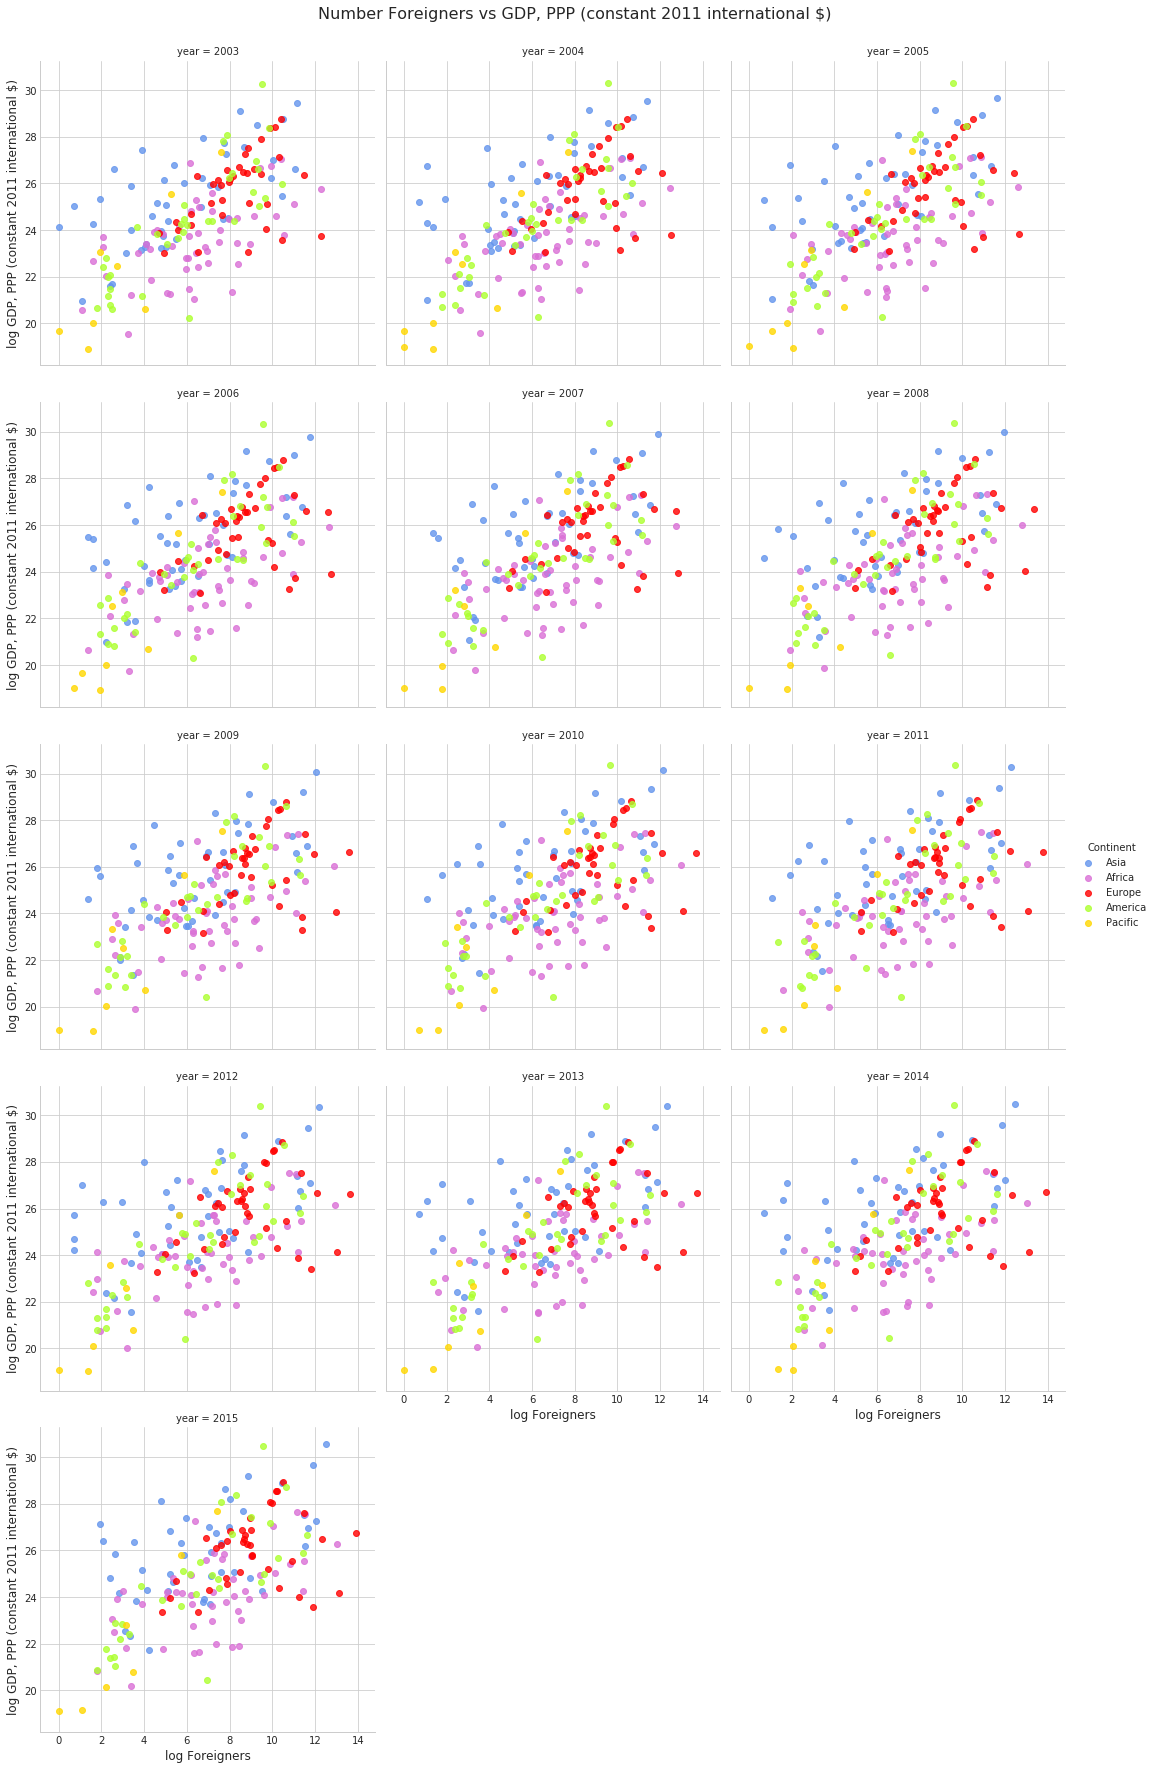

In [24]:
simple_regression(it_resident_foreigners, gdp_ppp_2011dollar, list(range(2003, 2016)), "GDP, PPP (constant 2011 international $)", fit_reg=False)

In [25]:
#simple_regression(it_resident_foreigners, gdp_pc_current_dollar, list(range(2003, 2016)))

In [26]:
#simple_regression(it_resident_foreigners, gdp_pc__ppp_current_dollar, list(range(2003, 2016)))

In [27]:
#simple_regression(it_resident_foreigners, gdp_pc__ppp_2011dollar, list(range(2003, 2016)))

In [28]:
#simple_regression(it_resident_foreigners, gni_pc_current_dollar, list(range(2003, 2016)))

In [29]:
#simple_regression(it_resident_foreigners, gni_pc_ppp_current_dollar, list(range(2003, 2016)))

In [30]:
#simple_regression(it_resident_foreigners, dec_conversion, list(range(2003, 2016)))

In [31]:
#simple_regression(it_resident_foreigners, exchange_rate, list(range(2003, 2016)))

In [32]:
#simple_regression(it_resident_foreigners, ppp_coversion, list(range(2003, 2016)))

In [33]:
#simple_regression(it_resident_foreigners, price_ratio_ppp, list(range(2003, 2016)))

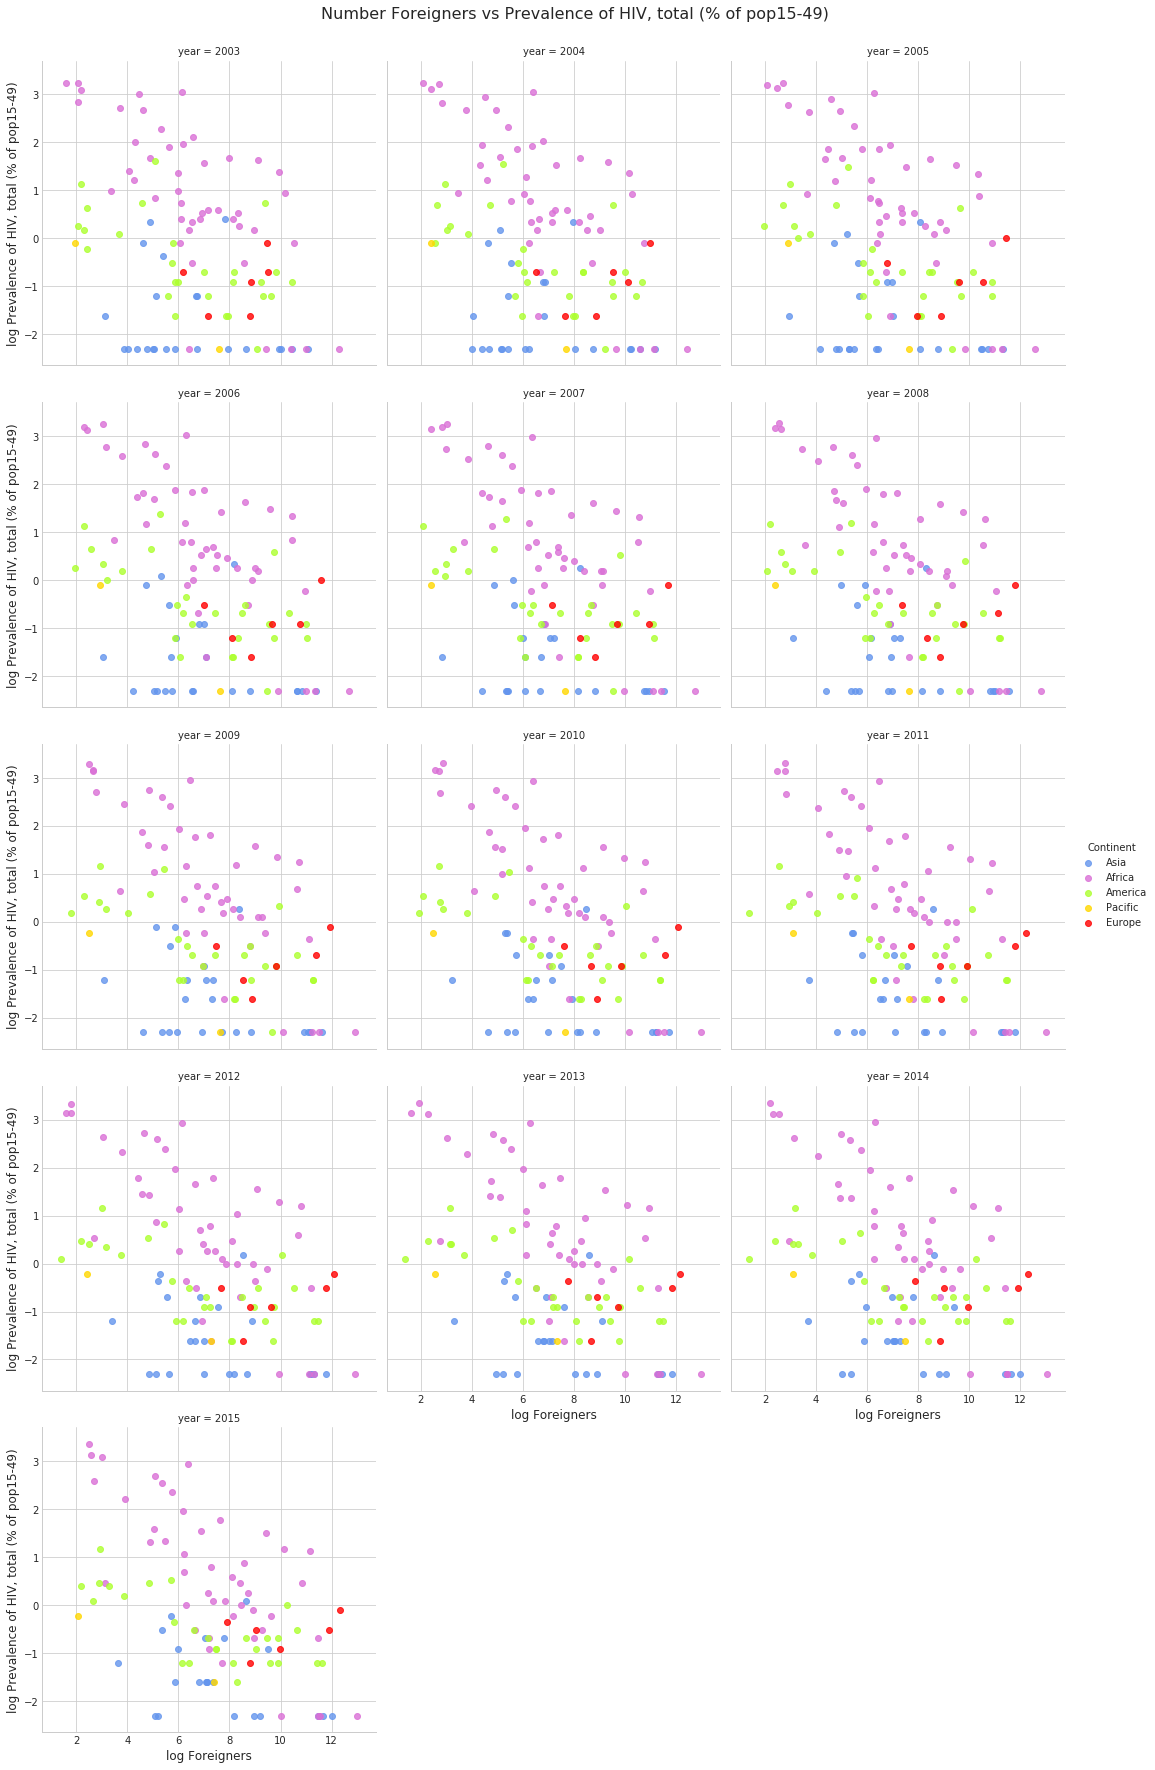

In [34]:
simple_regression(it_resident_foreigners, hiv, list(range(2003, 2016)), "Prevalence of HIV, total (% of pop15-49)", fit_reg=False)

In [36]:
get_out(hiv, -2, False)

['PHL',
 'EGY',
 'KAZ',
 'AUS',
 'YEM',
 'KGZ',
 'IRN',
 'BGD',
 'IDN',
 'GEO',
 'PAK',
 'DZA',
 'LKA',
 'MNG',
 'SDN',
 'CUB',
 'LBN',
 'AFG',
 'ARM',
 'AZE',
 'MAR',
 'TUN']

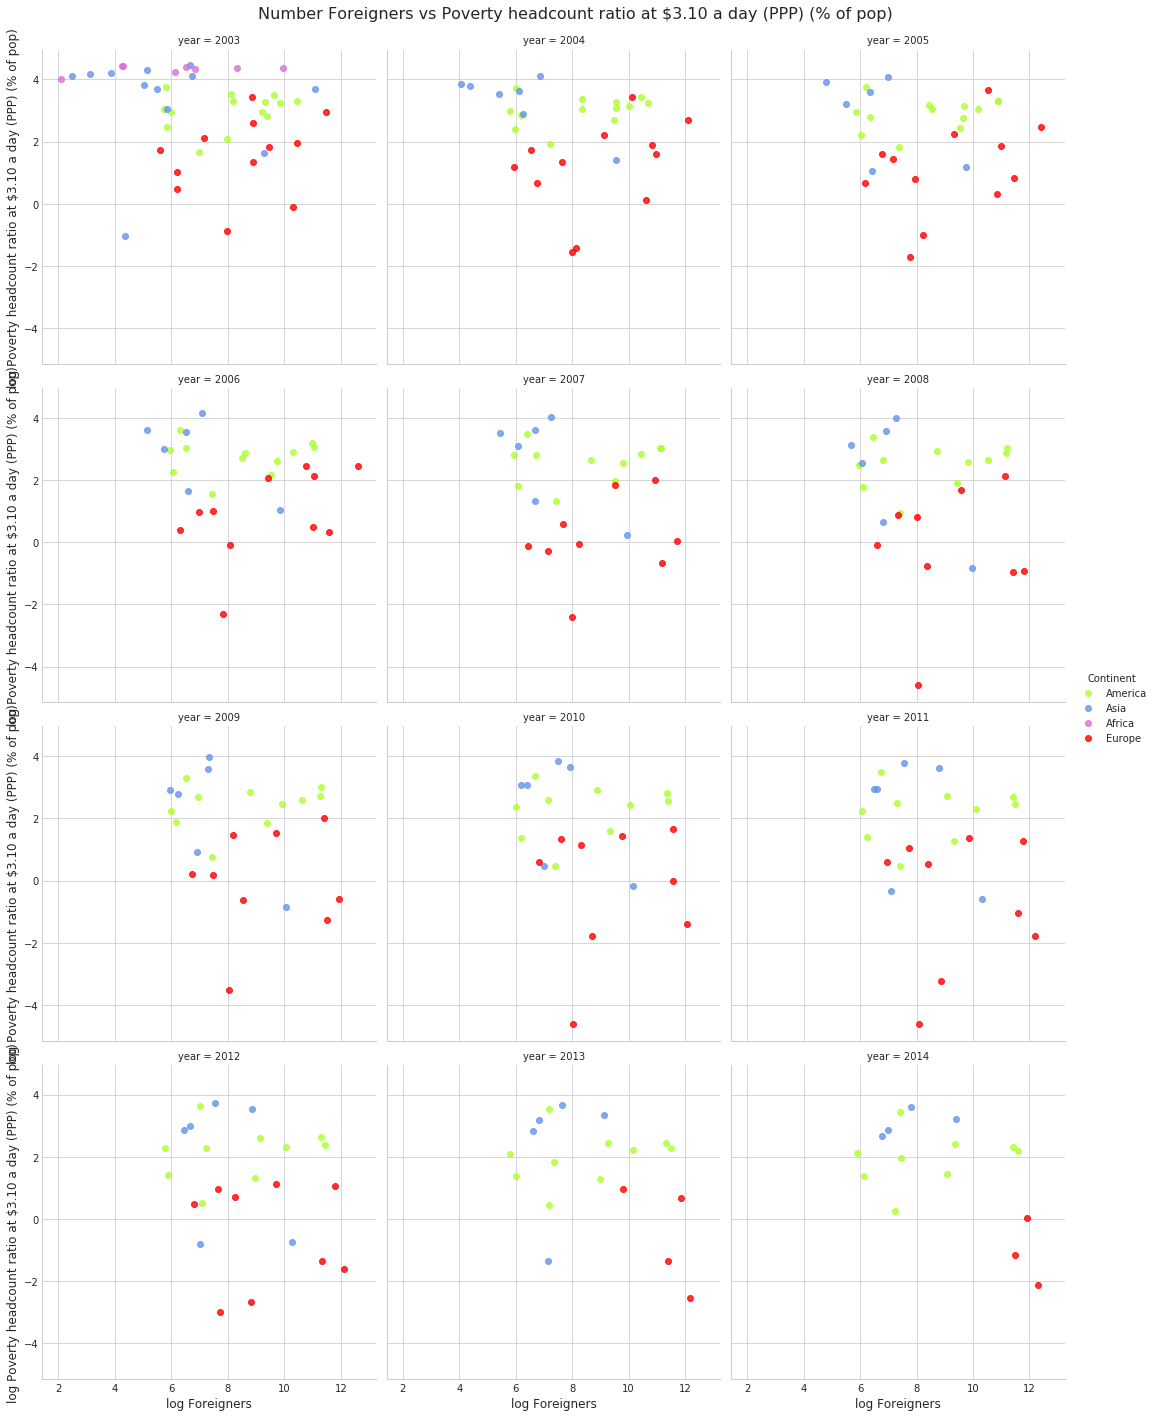

In [37]:
simple_regression(it_resident_foreigners, poverty1, list(range(2003, 2016)), "Poverty headcount ratio at $3.10 a day (PPP) (% of pop)", fit_reg=False)

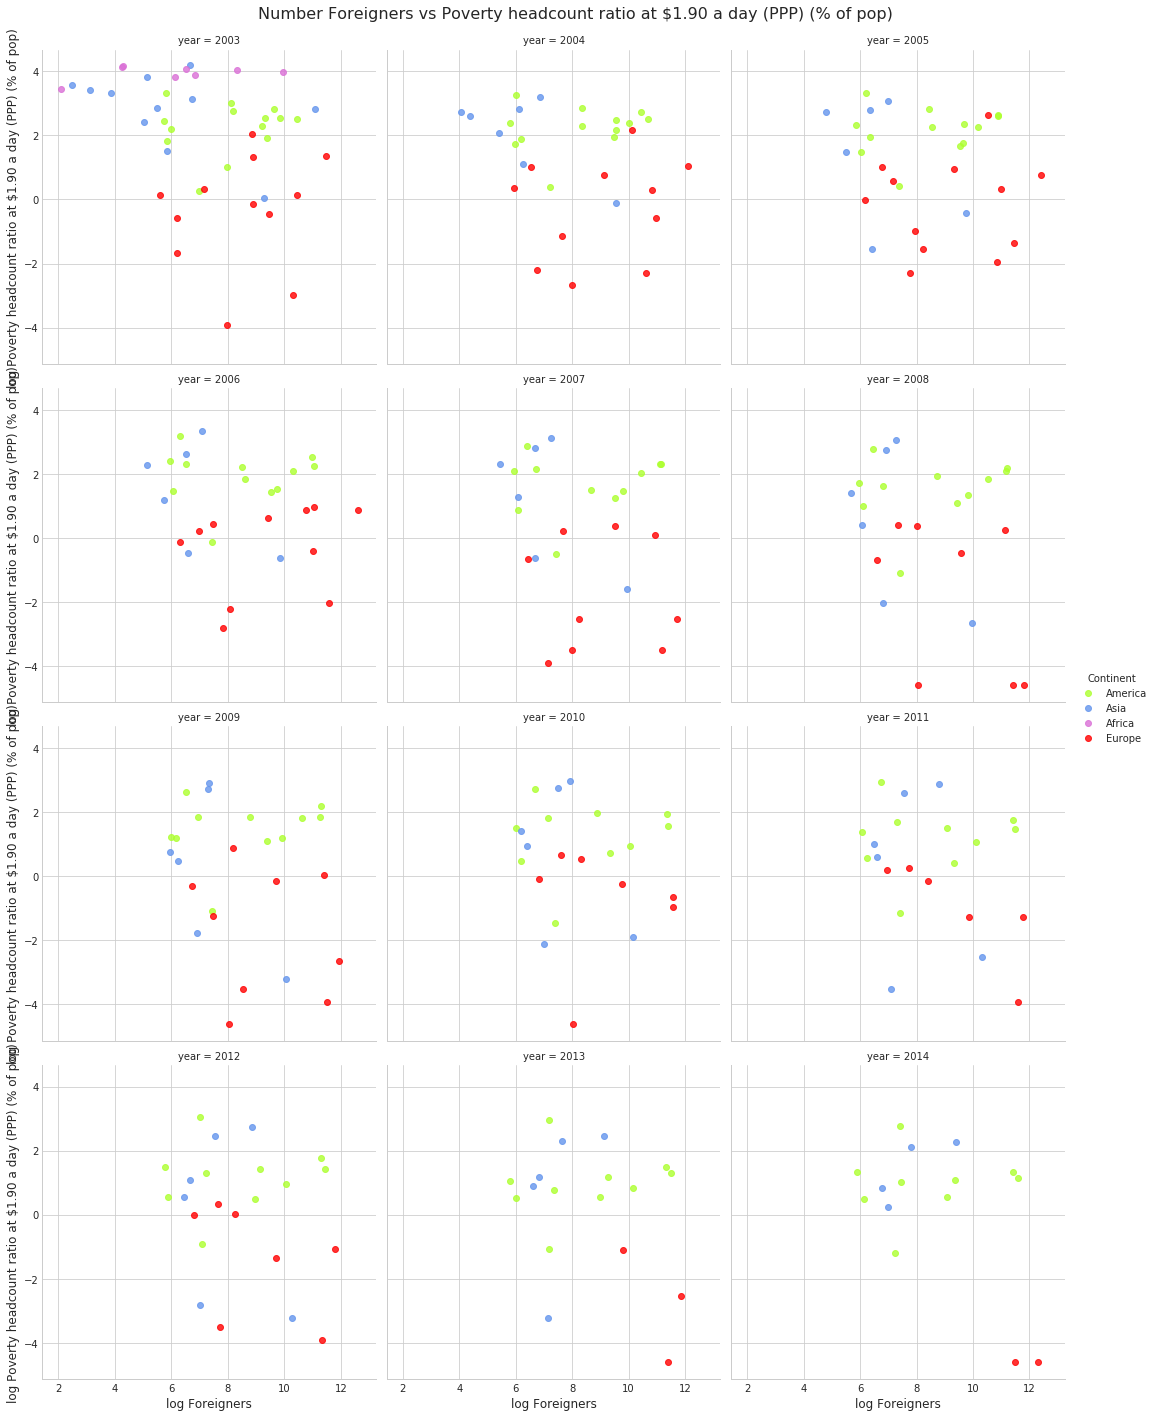

In [38]:
simple_regression(it_resident_foreigners, poverty2, list(range(2003, 2016)), "Poverty headcount ratio at $1.90 a day (PPP) (% of pop)", fit_reg=False)

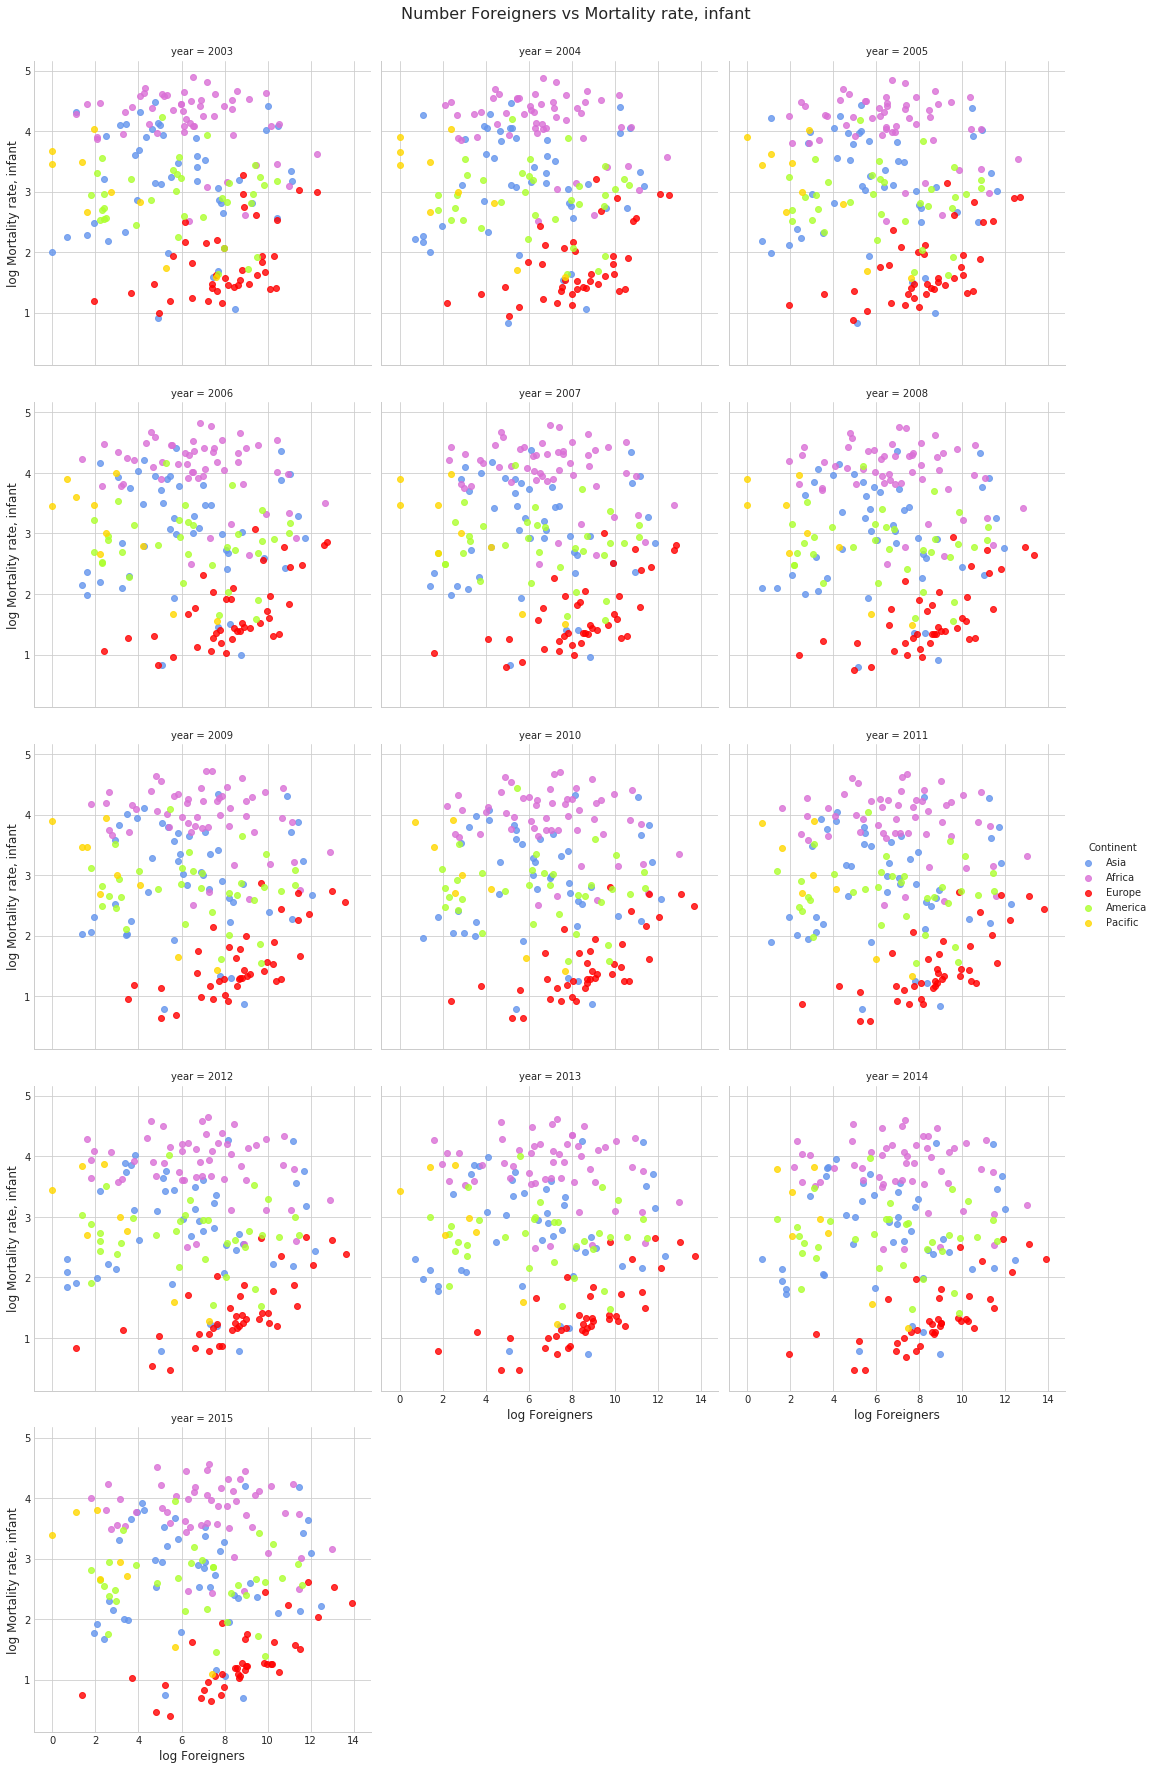

In [39]:
simple_regression(it_resident_foreigners, infant_mortality_rate, list(range(2003, 2016)), "Mortality rate, infant", fit_reg=False)

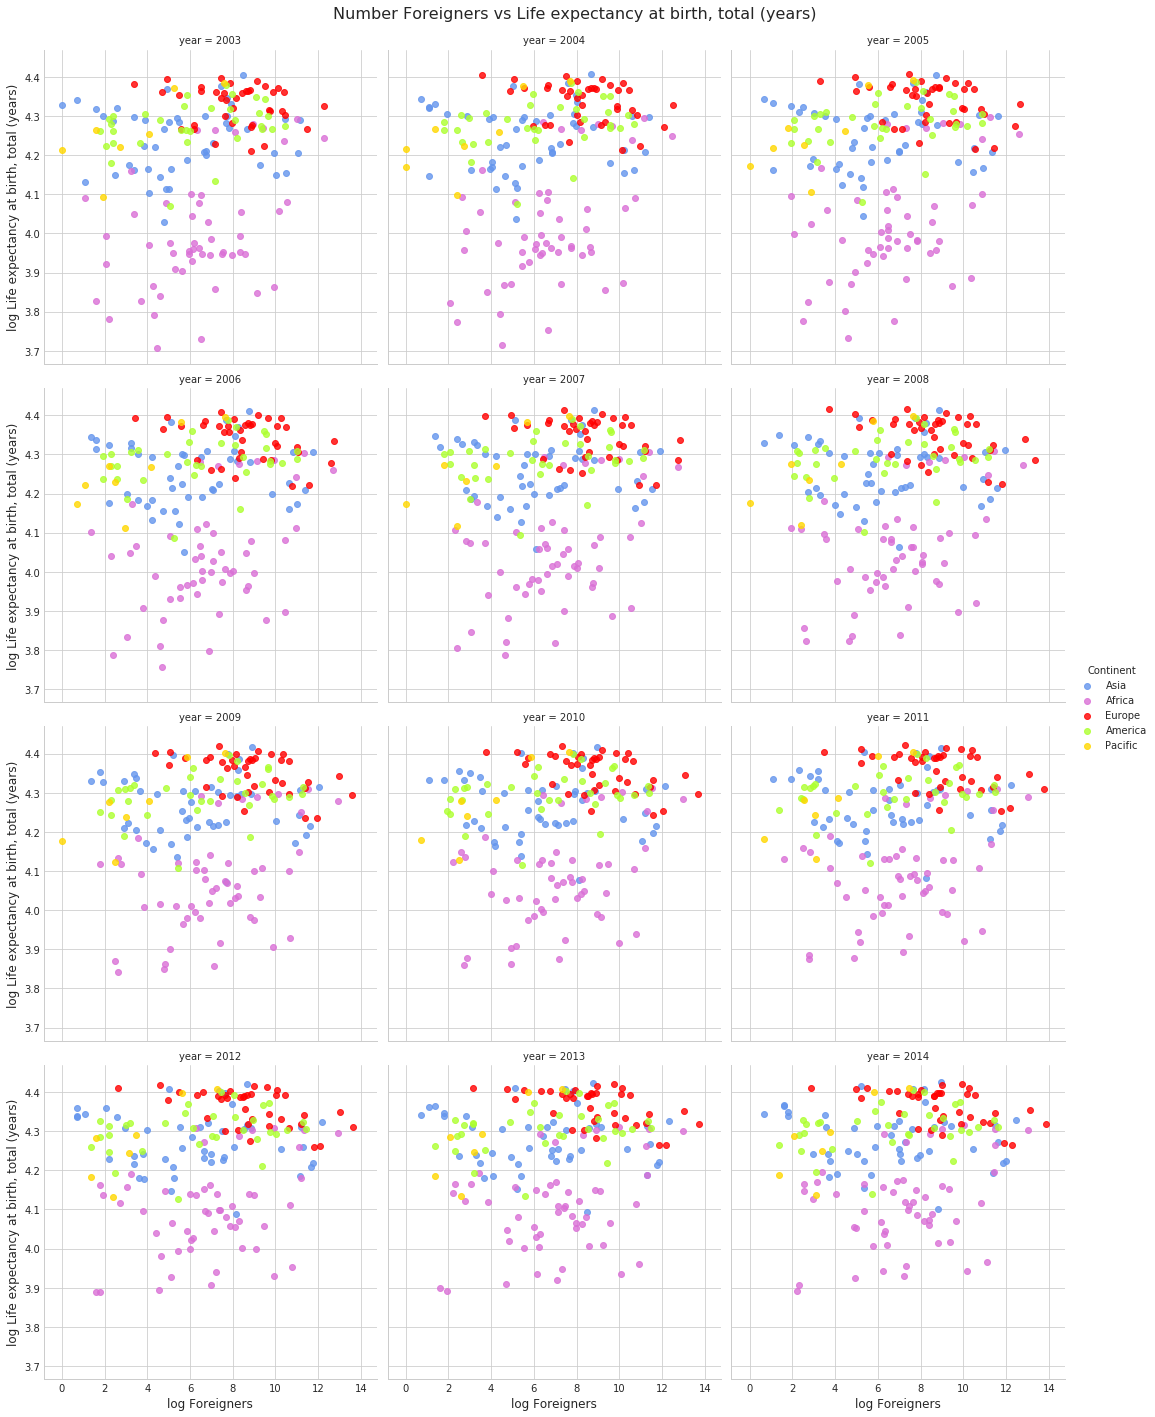

In [40]:
simple_regression(it_resident_foreigners, birth_life_exp, list(range(2003, 2016)), "Life expectancy at birth, total (years)", fit_reg=False)

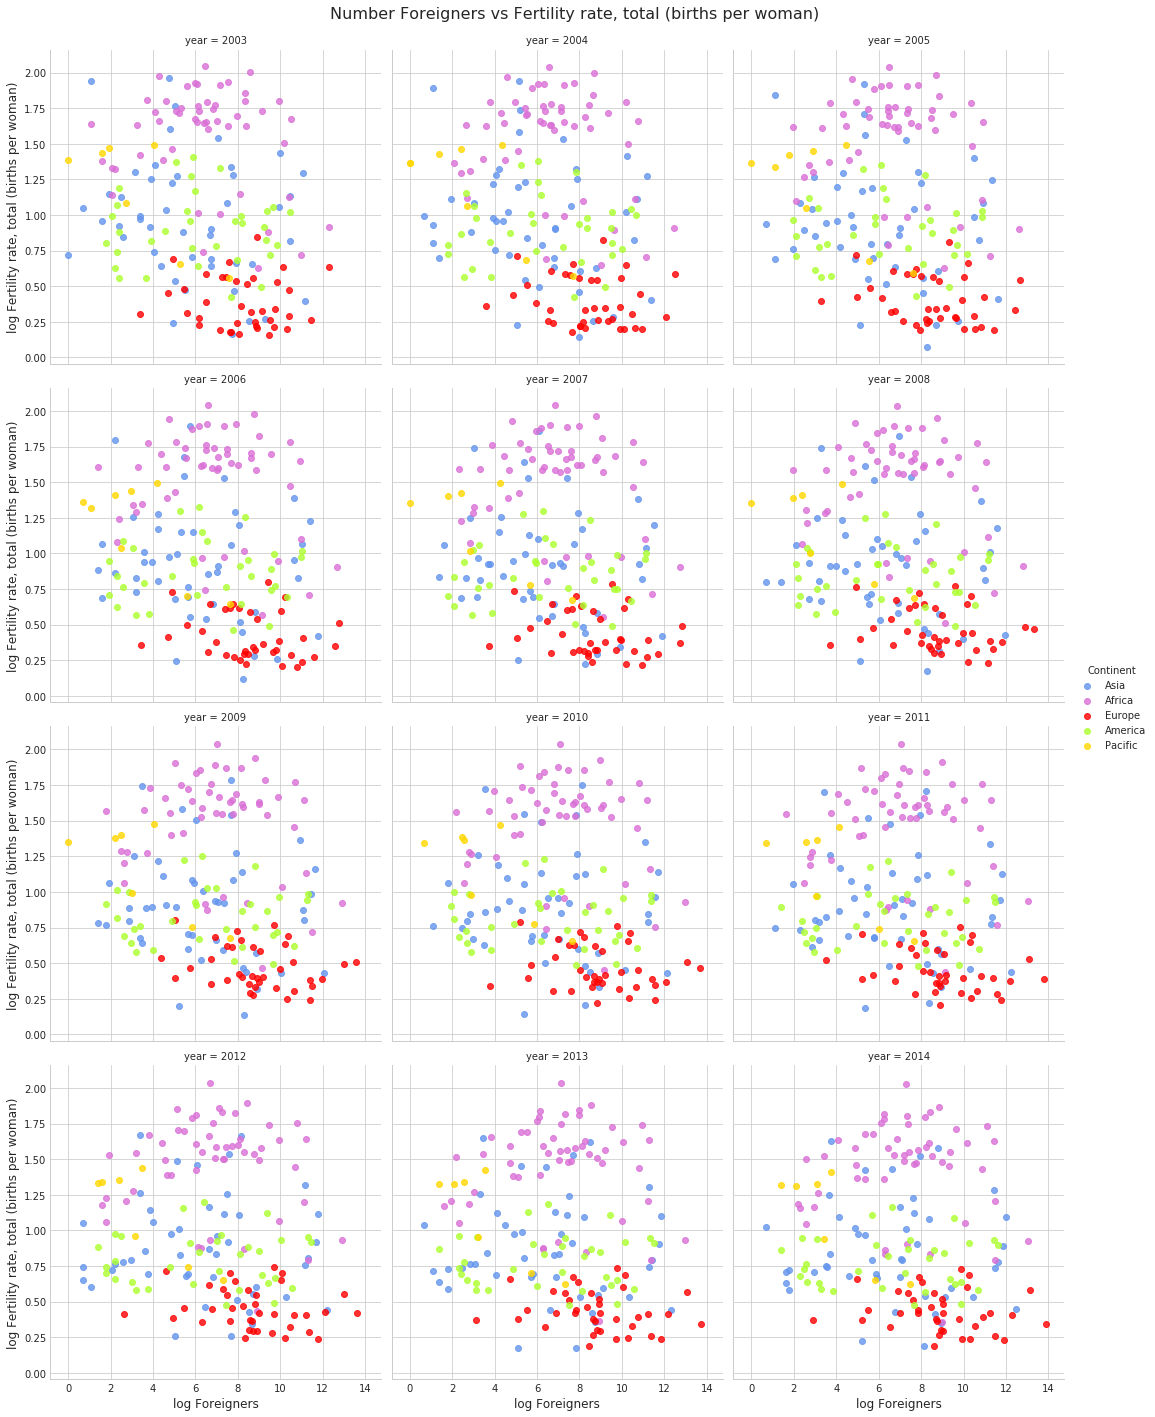

In [41]:
simple_regression(it_resident_foreigners, fertility_rate, list(range(2003, 2016)), "Fertility rate, total (births per woman)", fit_reg=False)

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log


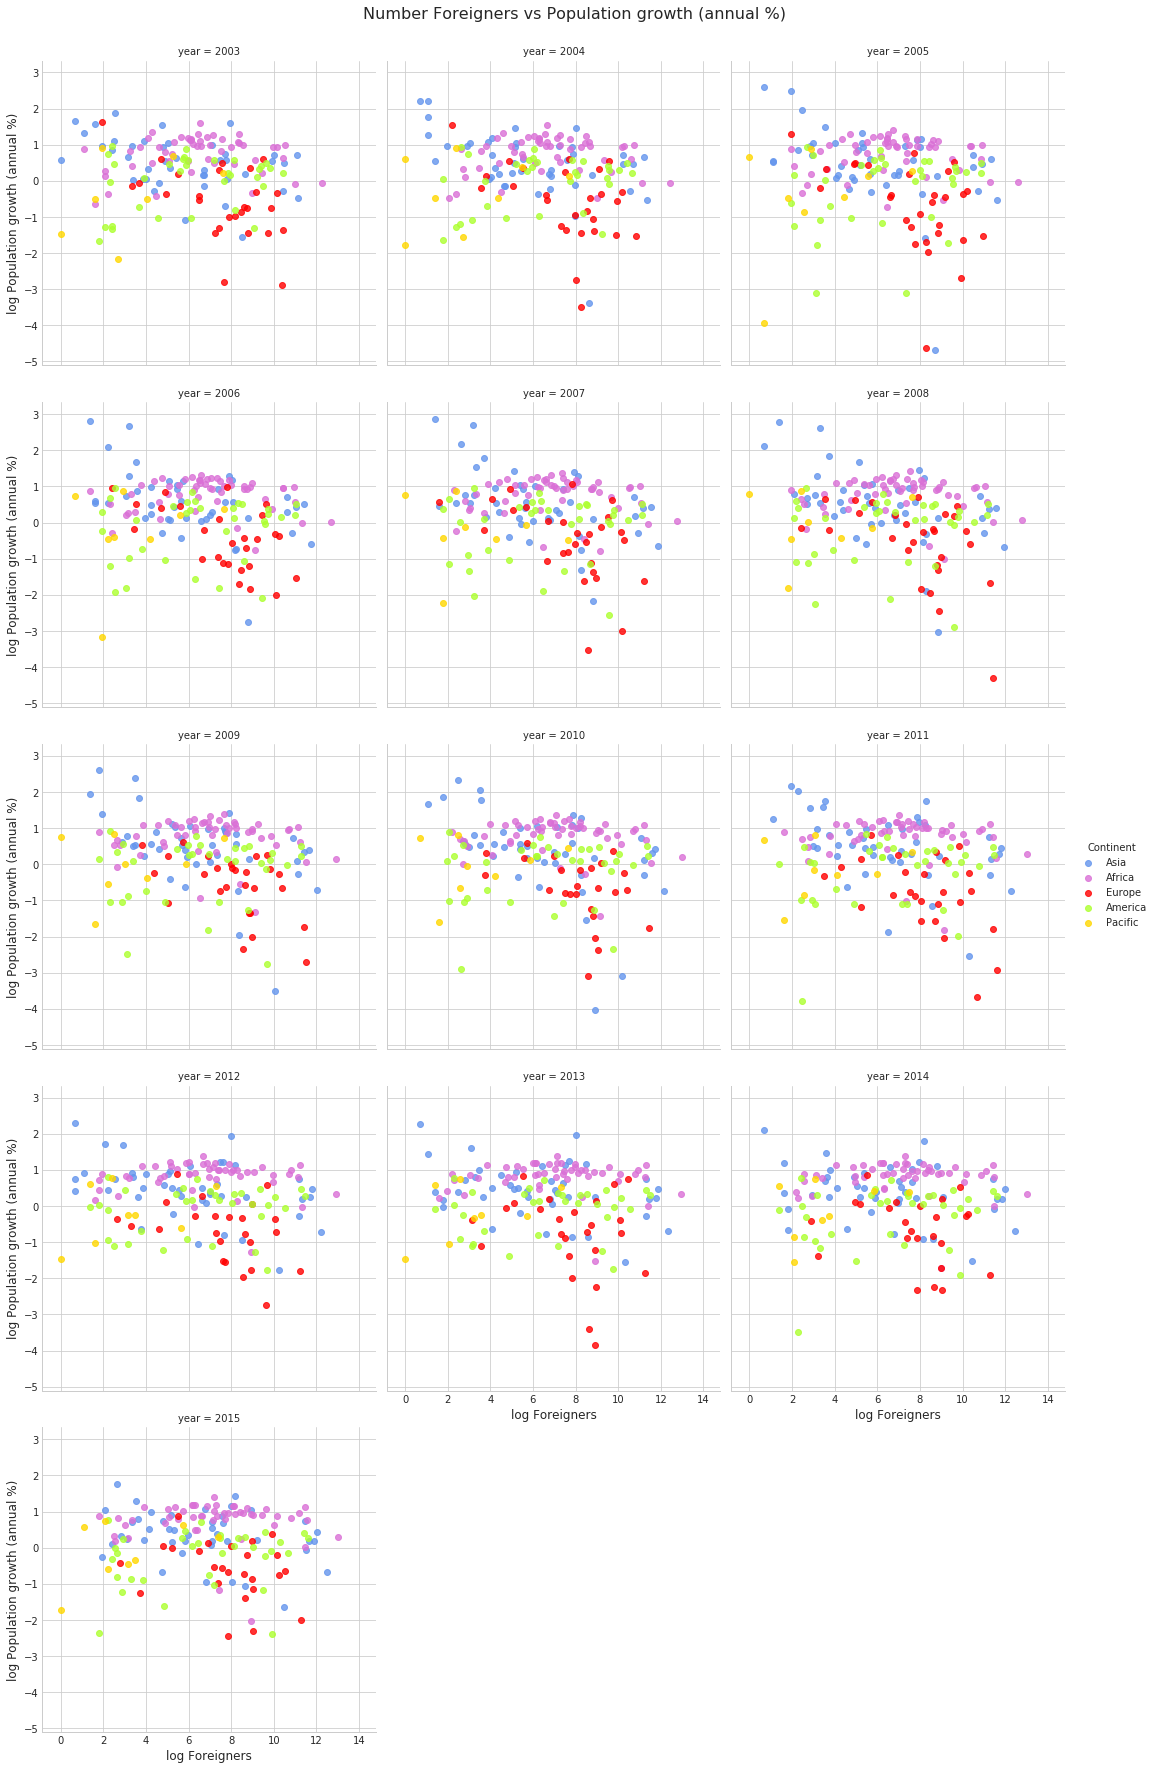

In [42]:
simple_regression(it_resident_foreigners, pop_growth, list(range(2003, 2016)), "Population growth (annual %)", fit_reg=False)

In [43]:
get_out(pop_growth, -3, False)

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


['NRU',
 'POL',
 'FSM',
 'VCT',
 'MHL',
 'BLR',
 'PRT',
 'URY',
 'CZE',
 'GUY',
 'SVK',
 'RUS',
 'JPN',
 'DEU']

In [44]:
#simple_regression(it_resident_foreigners, rural_pop, list(range(2003, 2016)))

In [45]:
#simple_regression(it_resident_foreigners, edu_gov_exp, list(range(2003, 2016)))

In [46]:
#simple_regression(it_resident_foreigners, pre_prim_gov_exp, list(range(2003, 2016)))

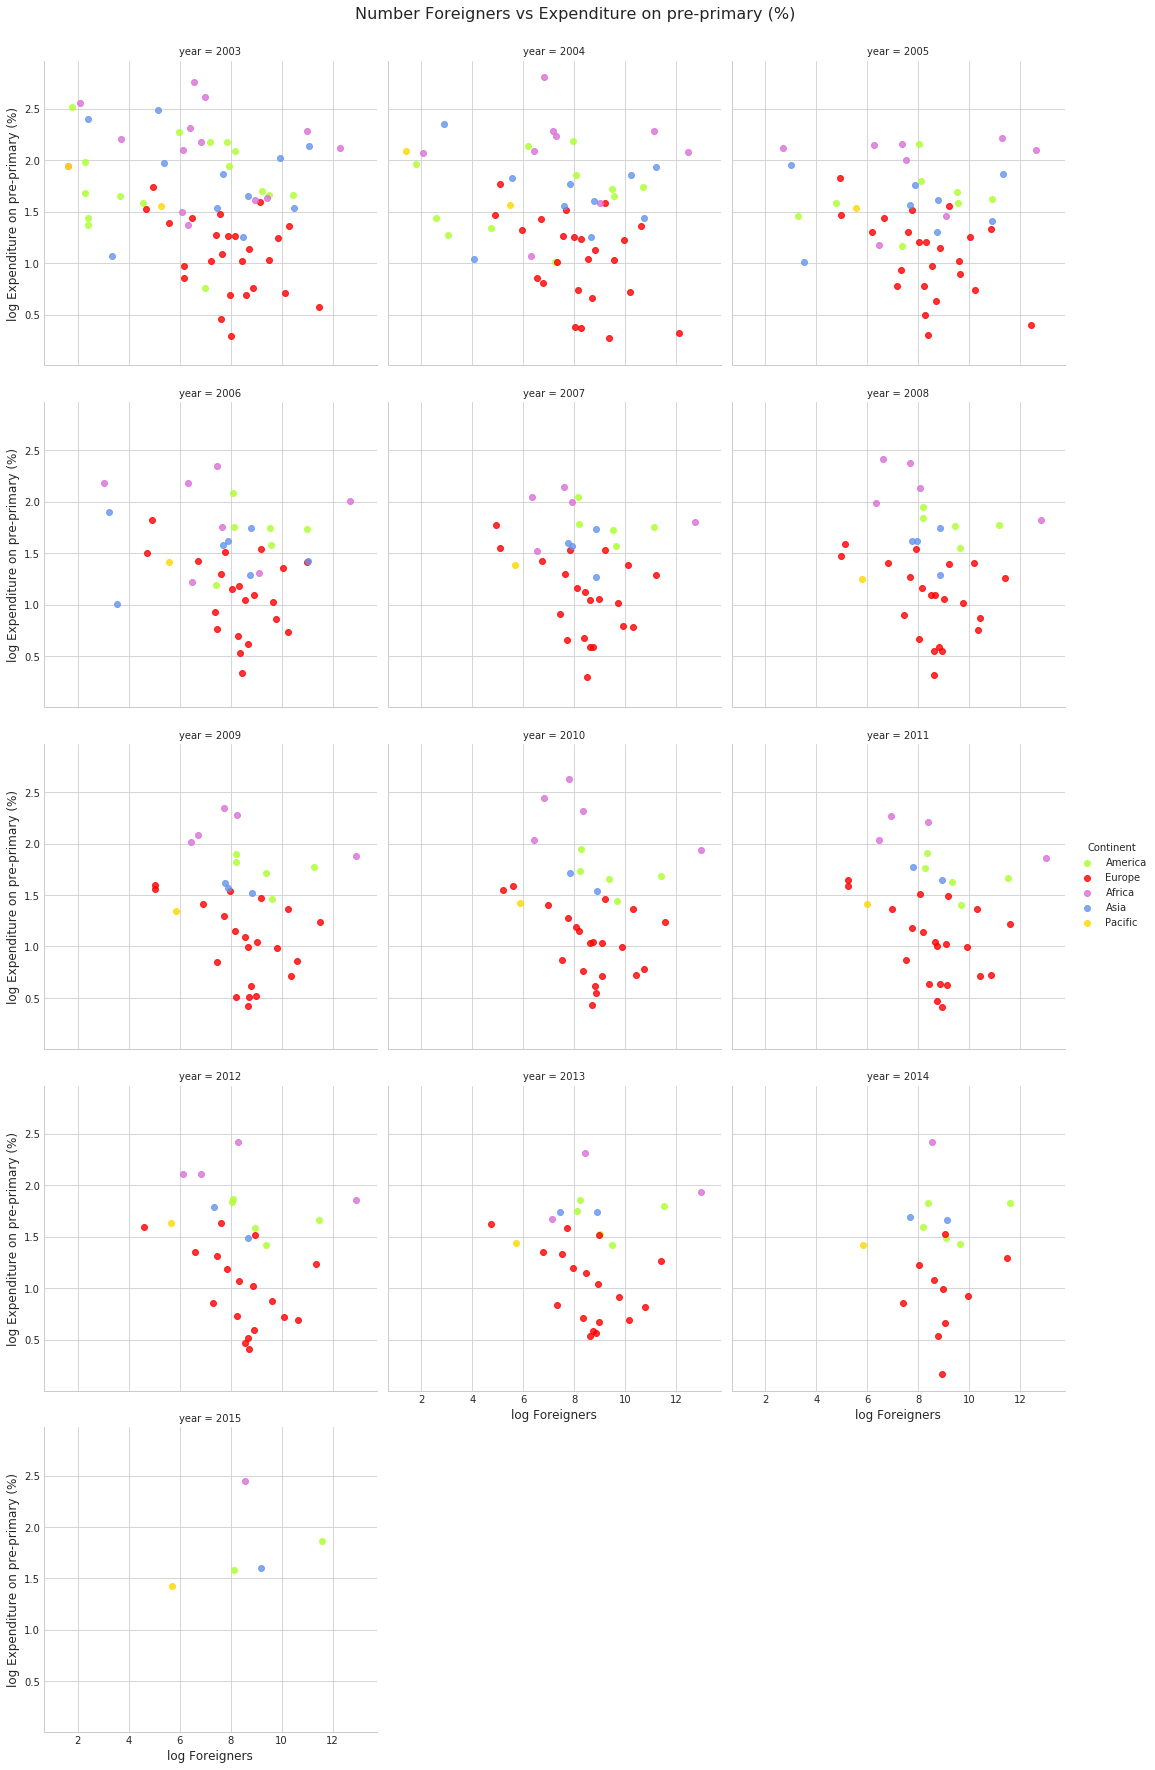

In [47]:
simple_regression(it_resident_foreigners, prim_gov_exp, list(range(2003, 2016)), "Expenditure on pre-primary (%)", fit_reg=False)

In [48]:
#simple_regression(it_resident_foreigners, lower_sec_gov_exp, list(range(2003, 2016)))

In [49]:
#simple_regression(it_resident_foreigners, sec_gov_exp, list(range(2003, 2016)))

In [50]:
#simple_regression(it_resident_foreigners, non_ter_gov_exp1, list(range(2003, 2016)))

In [51]:
#simple_regression(it_resident_foreigners, upper_sec_gov_exp, list(range(2003, 2016)), "Expenditure on upper secondary (%)", fit_reg=False)

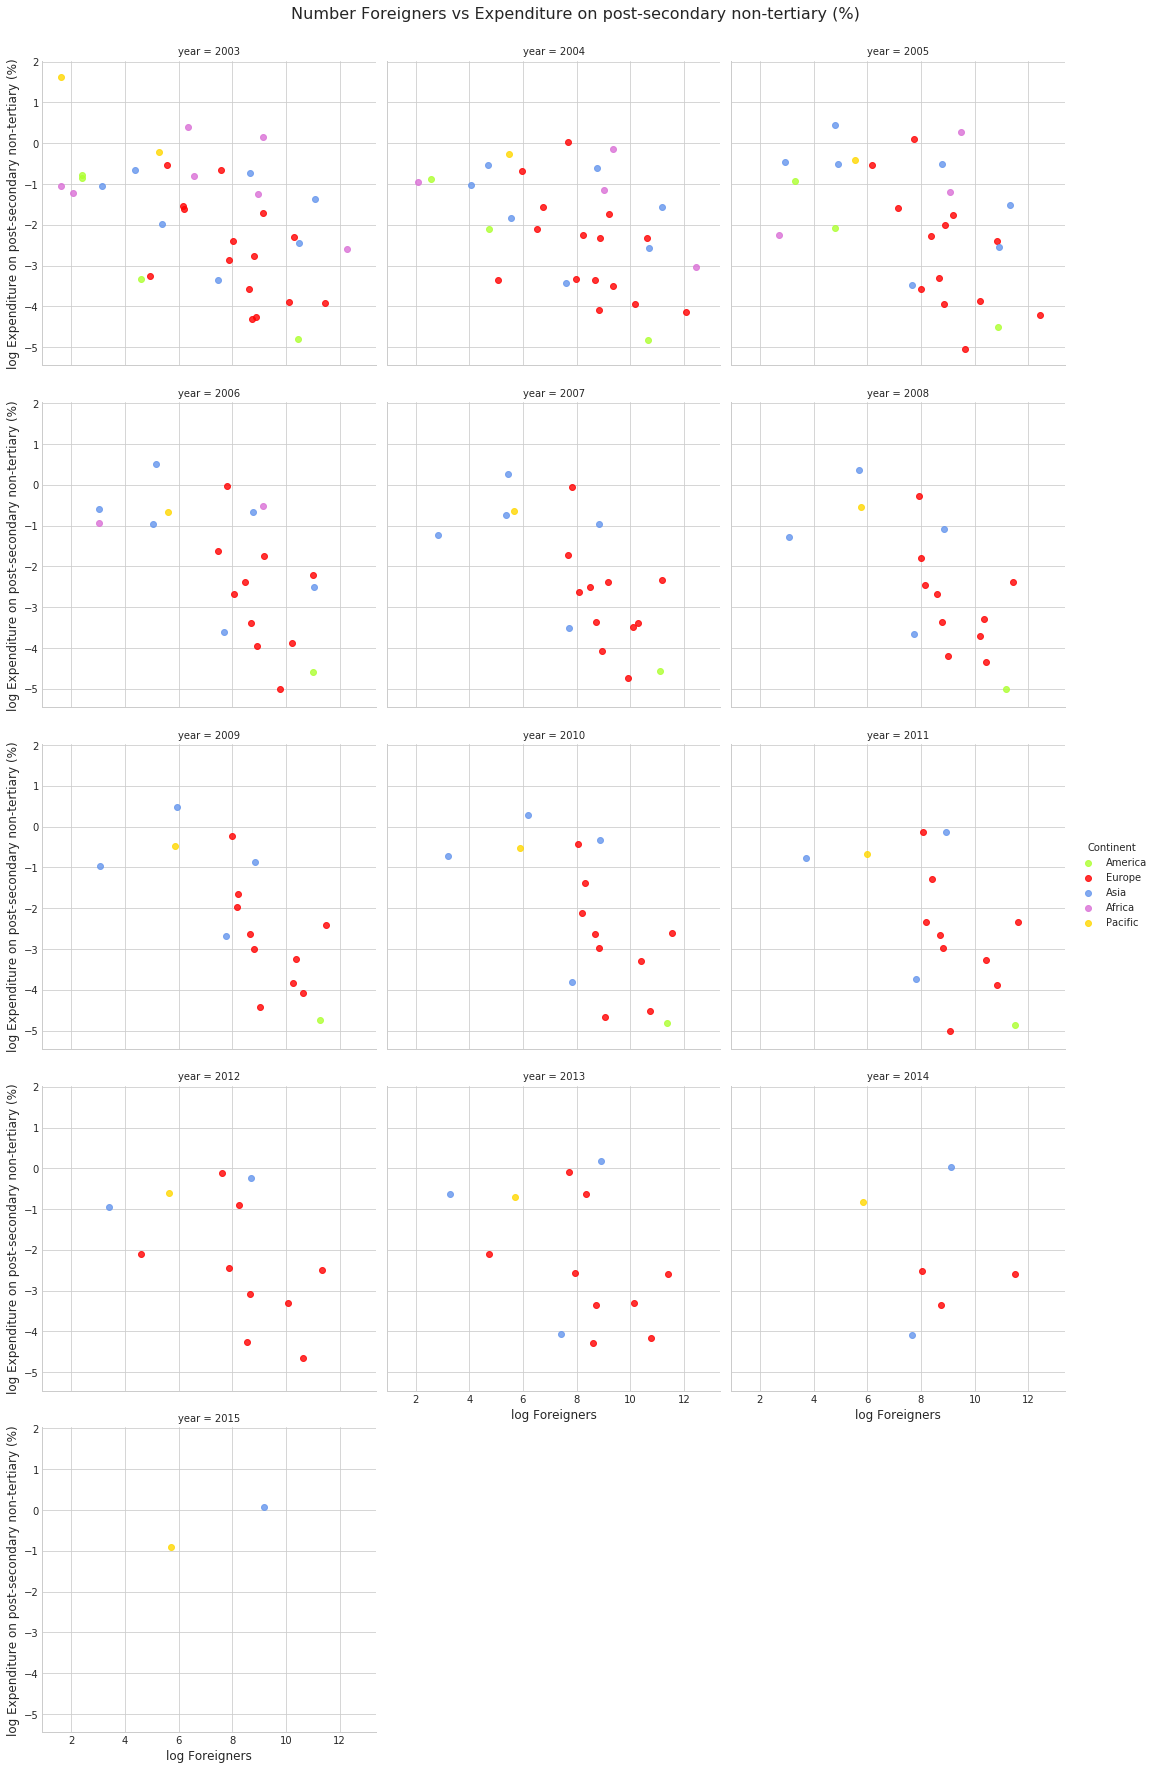

In [52]:
simple_regression(it_resident_foreigners, non_ter_gov_exp2, list(range(2003, 2016)), "Expenditure on post-secondary non-tertiary (%)", fit_reg=False)

In [53]:
#simple_regression(it_resident_foreigners, ter_gov_exp, list(range(2003, 2016)))

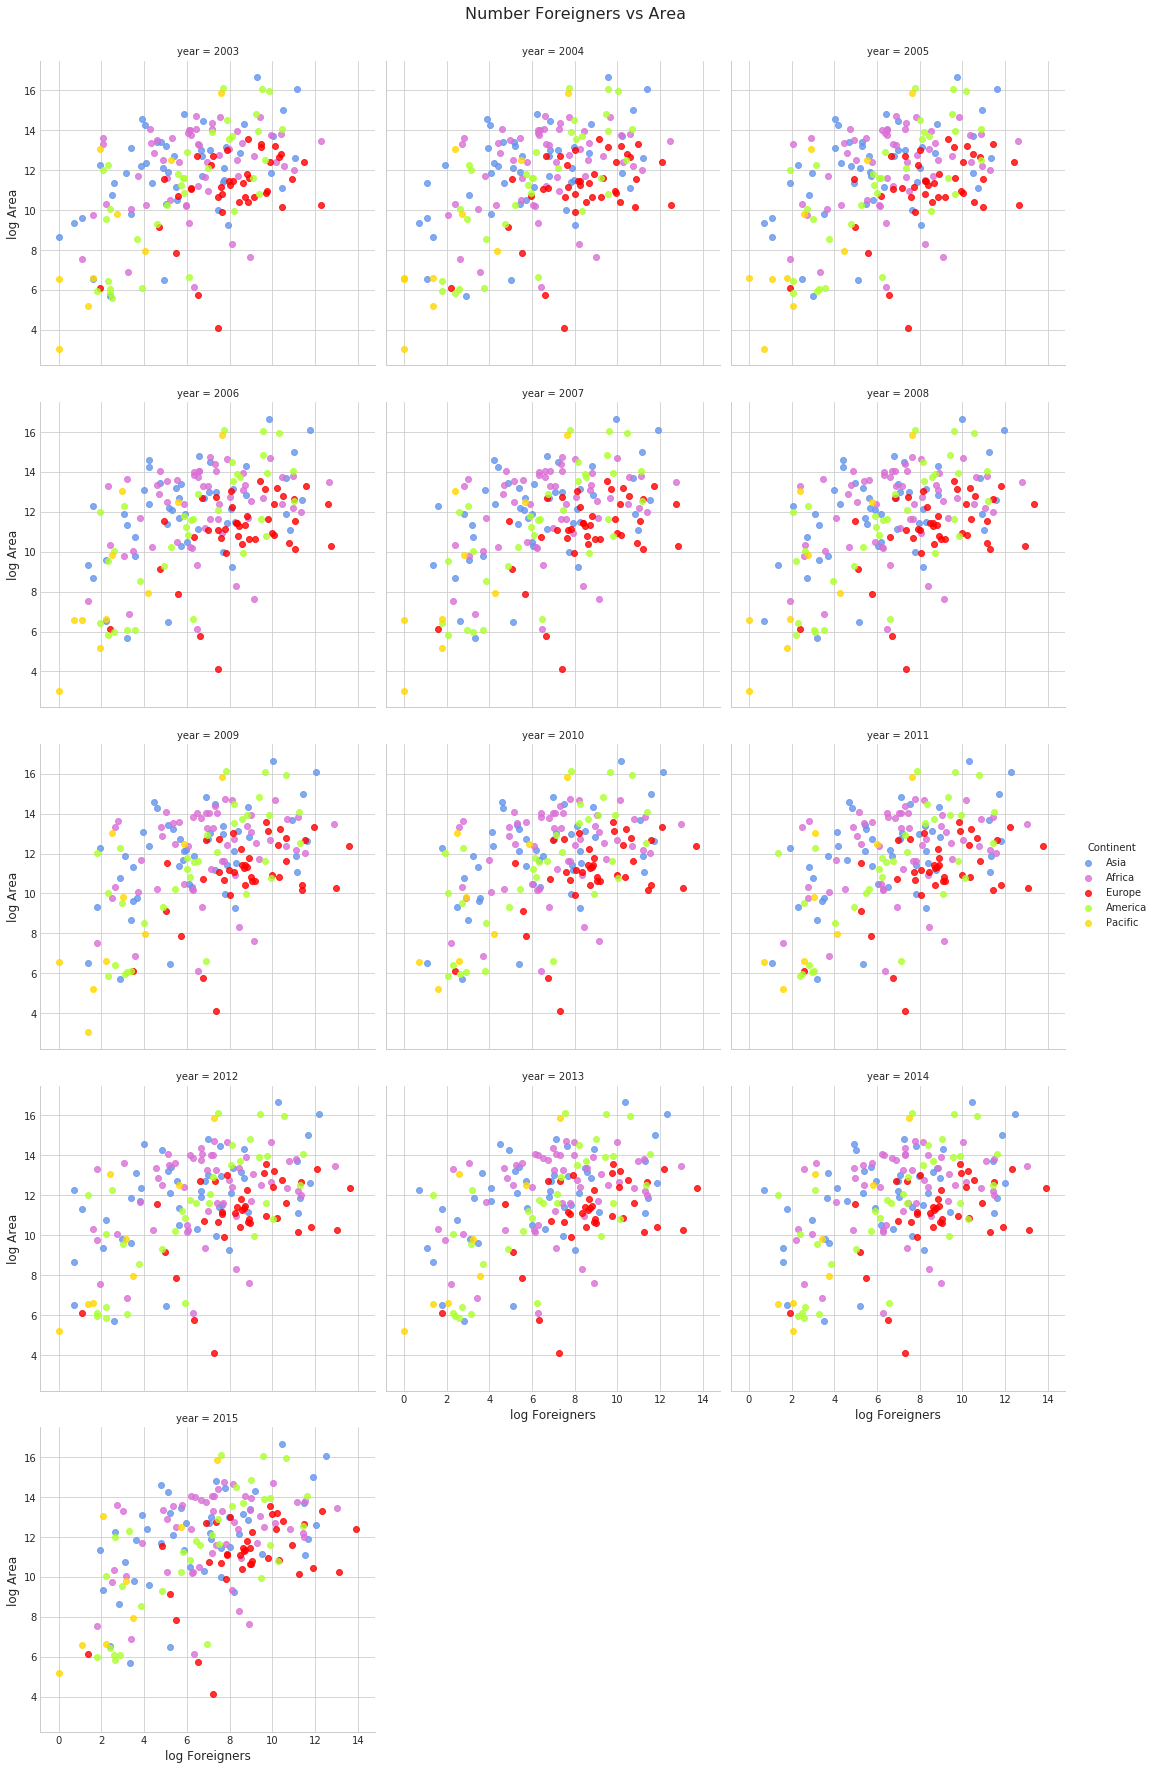

In [54]:
simple_regression(it_resident_foreigners, geo_info[["iso3", "area"]], list(range(2003, 2016)), "Area", fit_reg=False)

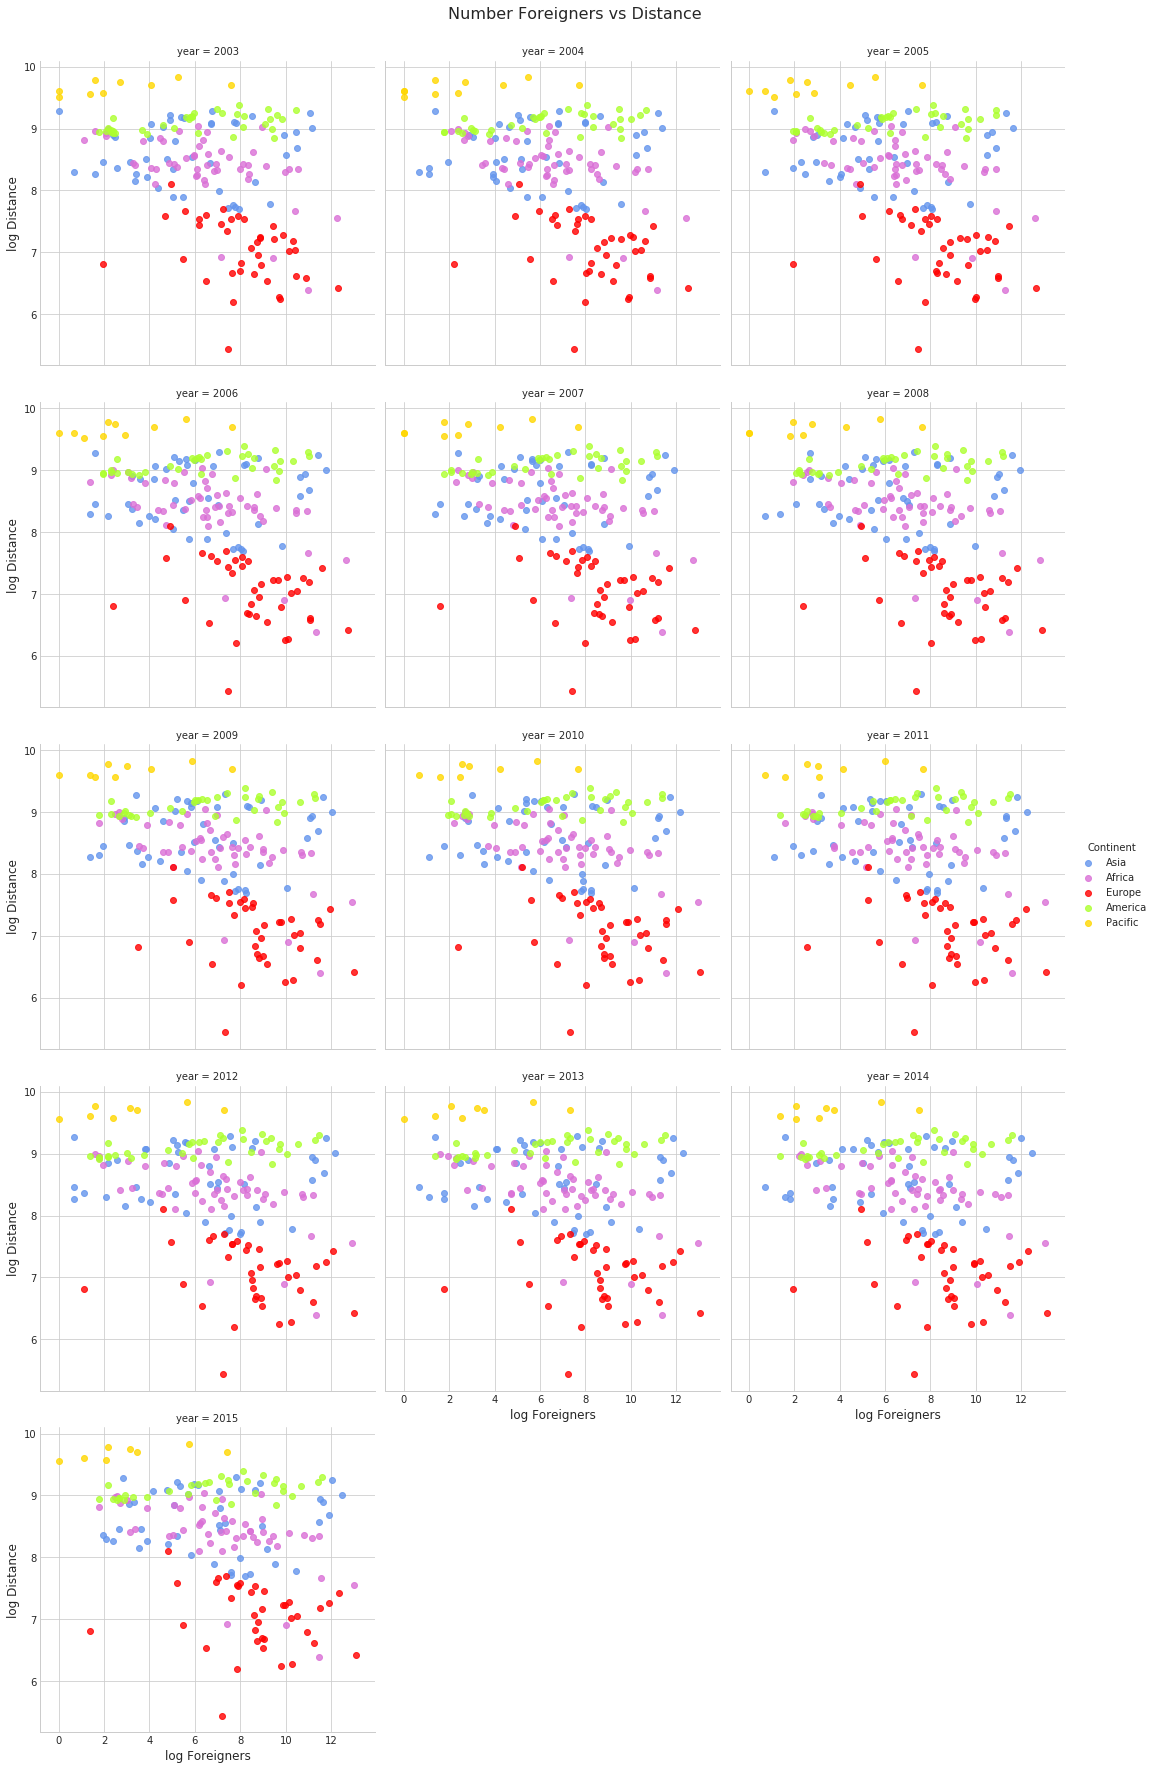

In [55]:
simple_regression(it_resident_foreigners, geo_dist_it[["iso_d", "dist"]], list(range(2003, 2016)), "Distance", fit_reg=False)

In [56]:
get_out(geo_dist_it[["iso_d", "dist"]], 6, False)

['SMR']

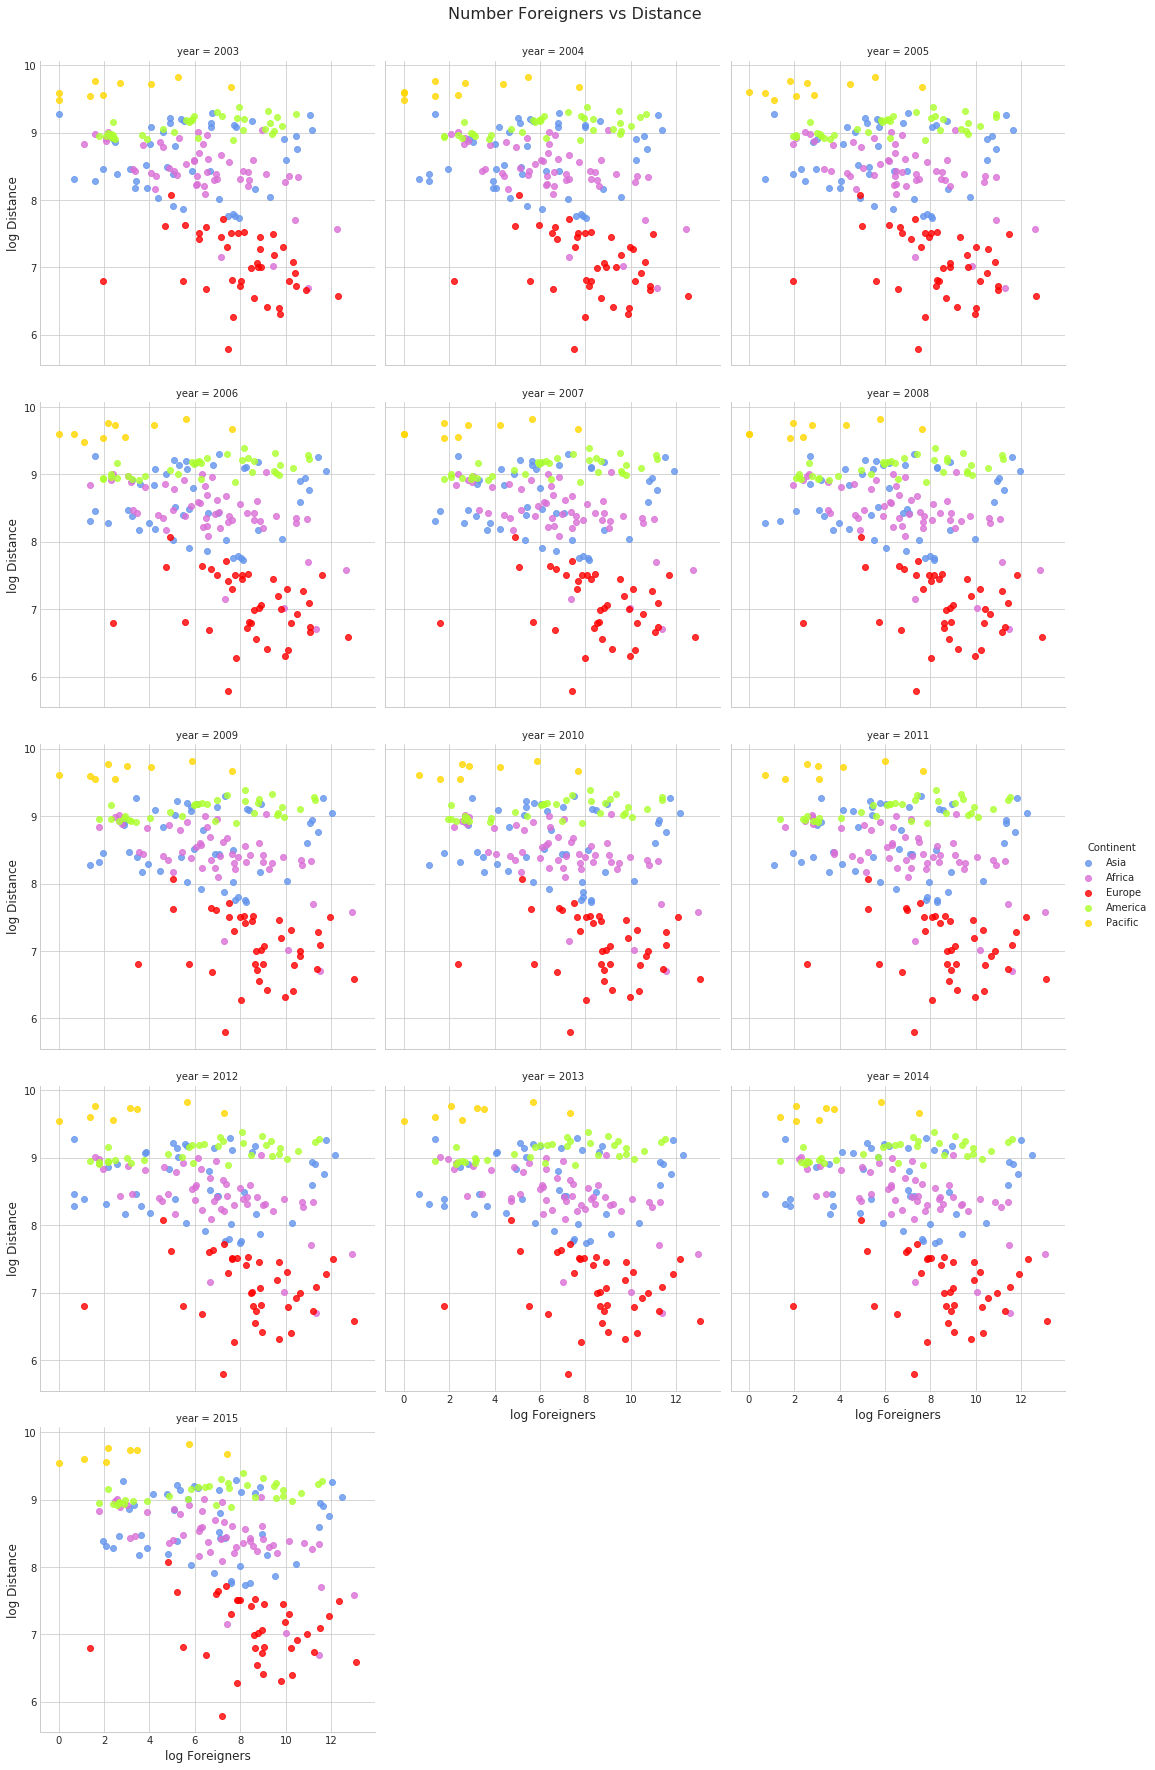

In [57]:
simple_regression(it_resident_foreigners, geo_dist_it[["iso_d", "distw"]], list(range(2003, 2016)), "Distance", fit_reg=False)

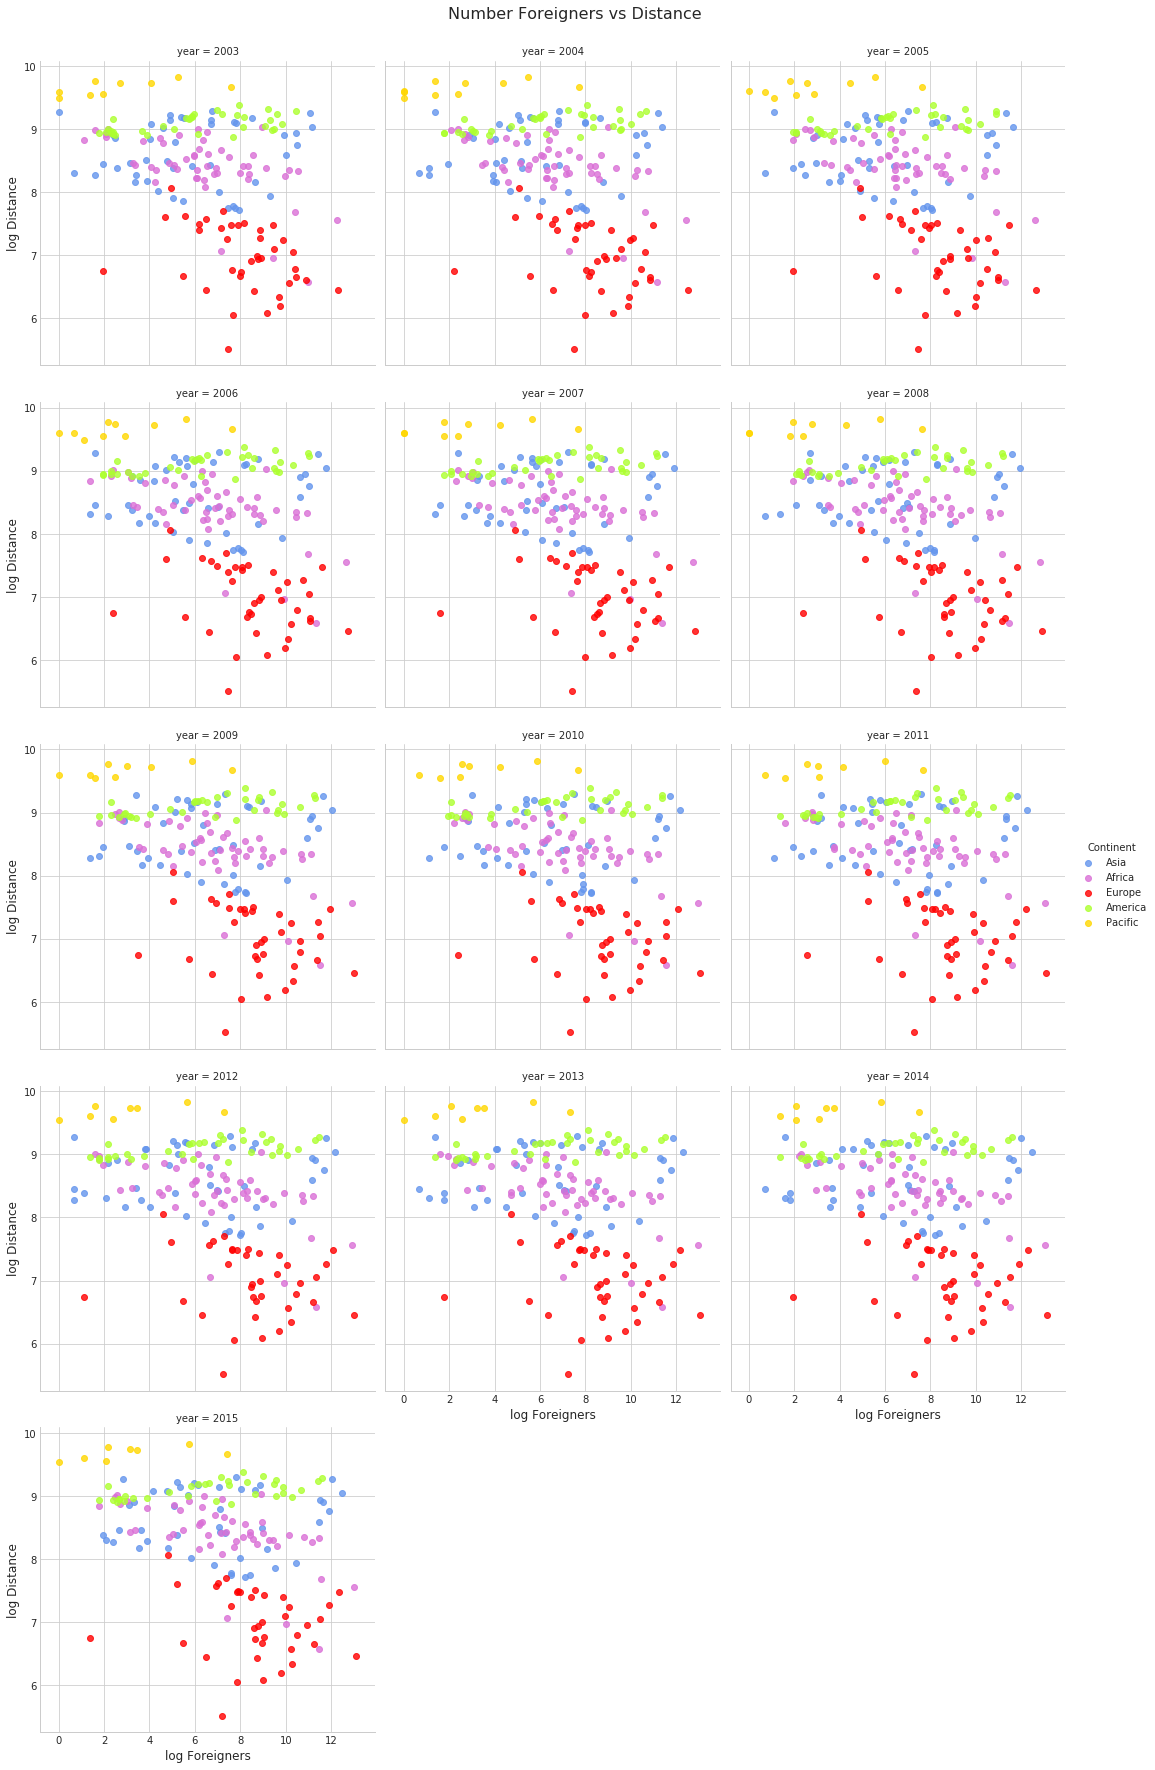

In [58]:
simple_regression(it_resident_foreigners, geo_dist_it[["iso_d", "distwces"]], list(range(2003, 2016)), "Distance", fit_reg=False)

In [20]:
def old(x_data, y_data, years, label_y, log = (True, True), fit_reg = True):
    all_c = it_resident_foreigners.index.levels[0]
    list_year = defaultdict(list)
    not_found = []
    for year in years:
        for c in all_c:
            try:
                temp1 = x_data[c][year]
                temp2 = y_data[c][year]
            except KeyError:
                not_found.append(c)
            # the != 0 conditions are needed, otherwise when the log transformation is performed a -inf is obtained
            if c not in not_found and temp1 != 0 and temp2 != 0:
                list_year["foreigners"].append(temp1)
                list_year["y"].append(temp2)
                list_year["year"].append(year)
                
    temp = pd.DataFrame.from_dict(list_year)
    
    if log[0] == True:
        temp["foreigners"] = list(map(np.log, temp["foreigners"]))
        x_label = "log Foreigners"
    else:
        x_label = "Foreigners"
    if log[1] == True:
        temp["y"] = list(map(np.log, temp["y"]))
        y_label = "log "+label_y
    else:
        y_label = label_y
        
    sns.set_style("whitegrid")
    sns.set_context({"figure.figsize": (10, 8)})
    g = sns.lmplot(x="foreigners", y="y", data=temp, fit_reg=fit_reg, col = "year", col_wrap = 3)
    ax = plt.gca()
    for ax in g.axes.flat:
        g.set_xlabels(x_label, fontsize=12)
        g.set_ylabels(y_label, fontsize=12)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle("Number Foreigners vs "+label_y, fontsize = 16)
    plt.show()
    plt.close()
  